In [17]:
import sys
!{sys.executable} -m pip install python-mnist
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install scipy
!{sys.executable} -m pip install xlrd
!{sys.executable} -m pip install xlwt
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install scipy

# ALC - Prova 2019.2

# Questão 1
    Resolução de sistemas lineares


## a) Analise de Matriz ##
    Está parte do código é feita para retornar ao usuário a situação da matriz de input dele...
    Aqui irá dizer se ela é uma m|atriz superior, inferior, diagonal ou nenhuma das opções. (Está classe assim como todas as outras só serão usados ao final do código)

In [18]:
class Analyze:

    isTriangularUpper = True
    isTriangularLower = True
    matrix = []
    square = 0

    def print(self, matrix_print):

        for i in range(0, len(self.matrix)):
            print("[ ", end='')
            for j in range(0, len(self.matrix)):
                print("{:.2f} ".format(matrix_print[i][j]), end='')
            print(']')

        return

    def type(self, matrix, square):
        # Matrix Variates #
        self.isTriangularLower = True
        self.isTriangularUpper = True
        self.square = square
        self.matrix = matrix[:]

        # Upper Triangular #
        for i in range(0, self.square):
            for j in range(0, self.square):
                if j < i and self.matrix[i][j] != 0:
                    self.isTriangularUpper = False

        # Lower Triangular #
        for i in range(0, self.square):
            for j in range(0, self.square):
                if j > i and self.matrix[i][j] != 0:
                    self.isTriangularLower = False

        # Return Type #
        print("A matriz recebida foi: ")
        self.print(self.matrix)

        print("e ela ", end='')
        if self.isTriangularUpper is True and self.isTriangularLower is False:
            print("é Triangular Superior! Logo, é possível solucionar sistemas lineares com subst para trás...")
        elif self.isTriangularUpper is False and self.isTriangularLower is True:
            print("é Triangular Inferior! Logo, é possível solucionar sistemas lineares com subst para frente...")
        elif self.isTriangularUpper is True and self.isTriangularLower is True:
            print("é Diagonal! Logo, é possível solucionar sistemas com substituição direta...")
        else:
            print("é genérica! Logo, serão necessários métodos mais sofisticados para resolver sistemas lineares!")

        print("")

        return

# Geral - Substituições #
    As substituições são métodos para resolver matrizes triangulares ou diagonais. Todos os métodos que serão vistos adiante utilizam este método em algum momento. É de fácil implementação e muito útil!

In [19]:
class Replace:

    def gen_vector(self, vector, size):

        for i in range(0, size):
            vector.append(0.0)

        return

    def back(self, matrix, vector):

        size = len(matrix) - 1
        solution = []
        self.gen_vector(solution, len(matrix))

        for i in range(size, -1, -1):

            sum = 0.0
            # Somando os termos já descobertos! #
            for j in range(size, i, -1):
                sum += solution[j] * matrix[i][j]

            solution[i] = (vector[i] - sum) / matrix[i][i]

        return solution

    def front(self, matrix, vector):

        size = len(matrix)
        solution = []
        self.gen_vector(solution, len(matrix))
        
        for i in range(0, size):

            sum = 0.0
            # Somando os termos descobertos #
            for j in range(0, i):
                sum += solution[j] * matrix[i][j]

            solution[i] = (vector[i] - sum)/ matrix[i][i]

        return solution


# Geral -Troca de Linhas #
    Algorítmo necessário nos casos em que existe pivoteamento pois o elemento da diagonal principal não pode ser 0.

In [20]:
def line_swap(matrix_, vector_):

    # for pra rodar a matrix procurando 0's na diagonal principal #
    for k in range(0, len(matrix_)):

        if matrix_[k][k] == 0:

            for j in range(0, len(matrix_)):

                if k != j and matrix_[j][k] != 0:
                    temp = matrix_[j][:]
                    temp2 = vector_[j]
                    matrix_[j] = matrix_[k][:]
                    vector_[j] = vector_[k]
                    matrix_[k] = temp[:]
                    vector_[k] = temp2

    return matrix_, vector_

## l) Numero Condição ##
Está parte do código diz a respeito do número condição de uma matriz que é usado para dizer se uma matriz está boa ou mal condicionada para uso. Isto é, um número condição estabelece uma estimativa da precisão que se pode obter para uma solução aproximada de x para o sistema Ax = b.

In [21]:
from numpy.linalg import inv as inv
from numpy import array


class ConditionNumber:
    matrix = []
    inverse = []

    def __init__(self, matrix):
        self.matrix = []
        self.copy(matrix, self.matrix)

    def copy(self, copied, pasted):

        for i in range(0, len(copied)):
            pasted.append(copied[i][:])

        return

    def inverse_matrix(self):
        
        matrix_ = array(self.matrix)
        
        inverse_ = inv(matrix_)
        self.inverse = inverse_.tolist()

        return

    def condition_number(self):

        self.inverse_matrix()

        print("Número condição com as normas:")
        print('\033[36m'+f"Norma linha: {self.norm_line(self.matrix) * self.norm_line(self.inverse)}"+'\033[0;0m')
        print('\033[36m'+f"Norma coluna: {self.norm_column(self.matrix) * self.norm_column(self.inverse)}"+'\033[0;0m')
        print('\033[36m'+f"Norma frobenius: {self.norm_frobenius(self.matrix) * self.norm_frobenius(self.inverse)}"+'\033[0;0m')
        print("Numeros condições próximos a 1 representam uma matriz bem condicionada.")
        print("Isto é, uma matriz que não tem uma grande influência no resultado final quando existe arredondamento de números.")
        print("\n" * 1)

        return

    @staticmethod
    def norm_column(matrix):

        best = 0.0
        for i in range(0, len(matrix)):
            current = 0.0
            for j in range(0, len(matrix[i])):
                current += abs(matrix[i][j])

            if current > best:
                best = current

        return best

    @staticmethod
    def norm_line(matrix):

        best = 0.0
        for i in range(0, len(matrix)):
            current = 0.0
            for j in range(0, len(matrix[i])):
                current += abs(matrix[j][i])

            if current > best:
                best = current

        return best

    @staticmethod
    def norm_frobenius(matrix):
        current = 0.0
        for i in range(0, len(matrix)):

            for j in range(0, len(matrix[i])):
                current += matrix[i][j]**2

        current = current**(1/2)

        return current

## b) Decomposição de Cholesky ##
A decomposição de Cholesky é feita dividindo uma matriz em A em um produto de uma matrizes. Sendo elas Uma matriz triangular inferior e sua transposta. Ou seja R * RT = A. Esse modo de resolução é muito útil para resolução de sistemas pois o deixa de mais fácil resolução para o computador!

In [22]:
from numpy.linalg import cholesky as choleskyzada
from numpy import array
from numpy import array_equal
from numpy import transpose
from numpy import transpose
from numpy import dot
from numpy.linalg import eigvals
import math

class Cholesky:

    matrix = []
    positive_definite = False
    cholesky = []
    vector = []
    solution = []

    def __init__(self, matrix, vector):
        self.matrix = []
        self.copy(matrix, self.matrix)
        self.vector = vector[:]
        self.cholesky = []
        self.generator(self.cholesky)

        return

    def copy(self, copied, pasted):

        for i in range(0, len(copied)):
            pasted.append(copied[i][:])

        return

    def generator(self, matrix):

        
        square = len(self.matrix)
        #matrix = []
        
        for i in range(0, square):
            matrix.append([])
            for j in range(0, square):
                matrix[i].append(0.0)

        return

    def print(self, matrix_print):

        for i in range(0, len(self.matrix)):
            print("[ ", end='')
            for j in range(0, len(self.matrix)):
                print("{:.2f} ".format(matrix_print[i][j]), end='')
            print(']')

        return

    def cholesky_dec(self):
        
        # Verificando se é simétrica e os autovalores são maiores que 0
        if (all(eigvals(array(self.matrix))) > 0) is True and (array_equal(self.matrix, transpose(self.matrix))) is True:
            self.positive_definite = True
            print("A matriz é positiva definida!")
        else:
            print("A matriz não é positiva definida! Logo não existe fator de cholesky para essa matriz!")
            return

        for i in range(len(self.matrix)):
            for j in range(i+1):
                sum = 0.0

                for k in range(j):
                    sum += self.cholesky[i][k] * self.cholesky[j][k]

                if i == j:
                    self.cholesky[i][j] = math.sqrt(self.matrix[i][j] - sum)

                else:
                    if self.cholesky[j][j] > 0:
                        self.cholesky[i][j] = (self.matrix[i][j] - sum)/ self.cholesky[j][j]

        print("FATOR DE CHOLESKY:")
        self.print(self.cholesky)
        self.linear_system()
        return

    def linear_system(self):
        replace = Replace()
        # Fator Cholesky R * RT * x = b #

        # Parte 1 ~ R * y = b (R é inferior) #
        temp = replace.front(self.cholesky, self.vector)
        # Parte 2 ~ RT * x = y (RT é superior) #
        self.solution = replace.back(transpose(self.cholesky).tolist(), temp)

        # Sistema resolvido #
        print("A solução do sistema por Cholesky é:")
        print('\033[33m'+f'{self.solution}'+'\033[0;0m')



        return

## c) LU ##
A decomposição LU é uma outra versão da eliminação de Gauss... Está divide uma matriz A em um produto de duas matrizes. Sendo a primeira triangular inferior e a segunda triangular superior. Ou seja resolução de sistemas utilizando desta fatoração é simples!

In [23]:
from numpy.linalg import det
from numpy import array
from numpy import dot

class LU:

    def __init__(self, matrix, vector):
        
        self.lower = []
        self.upper = []

        self.matrix = []
        self.vector = []
        self.solution = []
        
        self.square = len(matrix)
        self.generator(self.matrix)
        self.copy(matrix, self.matrix)
        self.vector = vector[:]
        
        return

    def det_main_submatrix(self):
        checked = True

        for i in range(self.square, 0, -1):
            temp = []
            for j in range(0, i):
                temp.append(self.matrix[j][:i])

            if det(array(temp)) == 0:
                checked = False
                return checked

        return checked

    def lower_generator(self):
        self.lower = []
        self.generator(self.lower)

        for i in range(0, self.square):
            for j in range(0, self.square):
                if i == j:
                    self.lower[i][j] = float(1.0)

        return

    def upper_generator(self):
        self.upper = []
        self.generator(self.upper)

        # The Function "lu_decomposition" of the class "LinearAlgebra" #
        # used to decompose the matrix into two simpler matrices #

    def linear_system(self):
        temp = []
        replace = Replace()
        # LUx = b #
        # PARTE 1 ~ Ly = b #
        temp = replace.front(self.lower, self.vector)

        # PARTE 2 ~ Ux = y #
        self.solution = replace.back(self.upper, temp)

        # Sistema resolvido #
        print("A solução do sistema por LU é:")
        print('\033[33m'+f'{self.solution}'+'\033[0;0m')

        return

    def lu_decomposition(self):
        if self.det_main_submatrix() is False:
            print("A decomposição LU não existe pois nem todos os determinantes das submatrizes são diferentes de 0!")
            return

        sum = float(0.0)
        pivot = float(0.0)

        self.lower_generator()
        self.upper_generator()

        # print(self.lower)
        # print(self.upper)

        # Olhando cada linha da matrix para Fazer Gauss #
        #temp = self.matrix[:]
        self.copy(self.matrix, self.upper)
        #self.matrix = temp[:]

        for i in range(0, self.square):

            pivot = self.upper[i][i]
            multiplier = 0.0

            # Fazendo a Eliminação #

            for j in range(i + 1, self.square):

                if self.upper[j][i] != 0:
                    multiplier = self.upper[j][i] / pivot

                    # Para Lower o Multiplier representa o elemento na linha coluna #
                    self.lower[j][i] = multiplier

                    # Se o elemento ta errado a gente substitui a linha #

                    for k in range(0, self.square):
                        self.upper[j][k] = self.upper[j][k] - (multiplier * self.upper[i][k])

        print("LOWER: ")
        self.print(self.lower)
        print("UPPER:")
        self.print(self.upper)

        self.linear_system()

        return

        # The Function "generator" of the class "LinearAlgebra" is #
        # made to used a NULL square matrix using list #

    def generator(self, matrix_gen):
        # Matrix n x n #
        for i in range(0, self.square):
            matrix_gen.append([])
            for j in range(0, self.square):
                matrix_gen[i].append(float(0.0))

        return

    def print(self, matrix_print):

        for i in range(0, self.square):
            print("[ ", end='')
            for j in range(0, self.square):
                print("{:.2f} ".format(matrix_print[i][j]), end='')
            print(']')

        return

        # Function to print x value! #

    def print_x(self):
        print("\n\n")
        print('-' * 30)
        print("The System Solution is: ")

        for i in range(0, self.square):
            print("X({}) = {}".format(i, self.x[i]))
        print('-' * 30)
        print("\n\n")

        input("Type something to continue...")

        return

    def copy(self, copied, pasted):

        for i in range(0, self.square):
            pasted[i] = copied[i][:]

        return

    def complete(self):

        self.lu_decomposition()
        # LUx = b Part 1 - Ly = b

        print("ORIGINAL:")
        self.print(self.matrix)
        print("\nLOWER:")
        self.print(self.lower)
        print("\nUPPER:")
        self.print(self.upper)

        return

# h) Eliminação de  Gauss #
Clássico método escadinha estudado nas escolas.

In [24]:
class GaussianElimination:

    def __init__(self, matrix, vector):
        
        self.vector = []
        self.matrix = []
        self.elimination = []
        self.solution = []
        
        self.square = len(matrix)
        self.generator(self.matrix)

        self.copy(matrix, self.matrix)
        self.vector = vector[:]
        
        return

    def copy(self, copied, pasted):

        for i in range(0, self.square):
            pasted[i] = copied[i][:]

        return

    def generator(self, matrix_gen):
        # Matrix n x n #
        for i in range(0, self.square):
            matrix_gen.append([])
            for j in range(0, self.square):
                matrix_gen[i].append(float(0.0))

        return

    def print(self, matrix_print):

        for i in range(0, self.square):
            print("[ ", end='')
            for j in range(0, self.square):
                print("{:.2f} ".format(matrix_print[i][j]), end='')
            print(']')

        return

    def gauss(self):

        sum = float(0.0)
        pivot = float(0.0)

        # Olhando cada linha da matrix para Fazer Gauss #
        self.elimination = []
        self.generator(self.elimination)
        self.copy(self.matrix, self.elimination)

        for i in range(0, self.square):

            pivot = self.elimination[i][i]
            multiplier = 0.0

            # Fazendo a Eliminação #

            for j in range(i + 1, self.square):

                if self.elimination[j][i] != 0:
                    multiplier = self.elimination[j][i] / pivot

                    # Se o elemento ta errado a gente substitui a linha #

                    for k in range(0, self.square):
                        self.elimination[j][k] = self.elimination[j][k] - (multiplier * self.elimination[i][k])

                    self.vector[j] = self.vector[j] - (multiplier * self.vector[i])

        print("MATRIZ ESCALONADA: ")
        self.print(self.elimination)
        print("VECTOR CORRESPONDENTE: ")
        print(self.vector)

        replace = Replace()
        self.solution = replace.back(self.elimination, self.vector)

        print("A solução do sistema por Eliminação de Gauss é: ")
        print('\033[33m'+f'{self.solution}'+'\033[0;0m')
        return




## e, f, g) Critérios ##
Antes de apresentar os métodos iterativos, temos que verificar se vale a pena tentar utilizar algum destes métodos, por conta disso apresento os critérios de convergência. Eles ajudam a dizer se uma matriz é boa ou ruim para ser usada em algum método. Os critérios usados foram linha, coluna e Sassenfeld

In [25]:
class Criterion:

    satisfySassenfeld = False
    satisfyLine = False
    satisfyColumn = False
    satisfyNorm = False

    def line(self, matrix):
        self.satisfyLine = True
        # Pegando o tamanho da matriz #
        square = len(matrix)
        # Loop para rodar a matriz #

        for i in range(0, square):
            sum = 0.0
            # Rodando as colunas #
            for j in range(0, square):
                if i != j:
                    sum += abs(matrix[i][j])

            # Avaliando linha correspondente #
            if abs(matrix[i][i]) > sum:
                self.satisfyLine = True
            else:
                print("A matriz NÃO satisfaz o critério de linhas, logo é improvável convergir com os métodos:")
                print("Jacobi, Gauss-Seidel e SOR")
                self.satisfyLine = False
                return

        if self.satisfyLine is True:
            print("A matriz satisfaz o critério de linhas, logo é possível convergir com os métodos:")
            print("Jacobi, Gauss-Seidel e SOR")
        return

    def column(self, matrix):
        self.satisfyColumn = True
        # Pegando o tamanho da matriz #
        square = len(matrix)
        # Loop para rodar a matriz #

        for i in range(0, square):
            sum = 0.0
            # Rodando as colunas #
            for j in range(0, square):
                if i != j:
                    sum += abs(matrix[j][i])

            # Avaliando linha correspondente #
            if abs(matrix[i][i]) > sum:
                self.satisfyColumn = True
            else:
                print("A matriz NÃO satisfaz o critério de colunas, logo é improvável convergir com os métodos:")
                print("Jacobi, Gauss-Seidel e SOR")
                self.satisfyColumn = False
                return

        if self.satisfyColumn is True:
            print("A matriz satisfaz o critério de colunas, logo é possível convergir com os métodos:")
            print("Jacobi, Gauss-Seidel e SOR")
        return

    def genBeta(self, beta, square):
        for i in range(0, square):
            beta.append([])

        return

    def sassenfeld(self, matrix):

        square = len(matrix)
        beta = []
        self.genBeta(beta, square)

        # Rodando matriz para definir o Beta #
        for i in range(0, square):
            sum = 0.0
            for j in range(0, square):
                if j < i:
                    sum += beta[j] * abs(matrix[i][j])
                if j > i:
                    sum += abs(matrix[i][j])

            beta[i] = sum / abs(matrix[i][i])

        if max(beta) < 1:
            print("A matriz satisfaz o critério de Sassenfeld, logo é possível convergir com os métodos:")
            print("Gauss-Seidel e SOR")
            self.satisfySassenfeld = True
        else:
            print("A matriz NÃO satisfaz o critério de Sassenfeld, logo é improvável convergir com os métodos:")
            print("Gauss-Seidel e SOR")
            self.satisfySassenfeld = False

        return


# e, f, g) Métodos Iterativos #
Estes são métodos que te aproximam de uma resposta a cada vez que um mesmo processo é executado. Os métodos usados aqui foram Jacobi, Gauss-Seidel e SOR. E cada um irá convergir de sua própria maneira.

In [27]:
class Iterative:
    def __init__(self, matrix, vector):
        # Resp = 15, 1, 2
        self.matrix = []
        self.copy(matrix, self.matrix)

        self.result = vector[:] # B #
        self.possible = []  # Possible X #
        self.possible_old = []  # Possible Iteration Old #
        self.size = len(self.result)
        self.w = 1.742
        self.tolerance = 0.00000000000001
        self.criterion = "NULL"

        return

    def generator(self, matrix, size):

        for i in range(0, size):
            matrix.append([])
            for j in range(0, size):
                matrix[i].append(0.0)

        return

    def copy(self, copied, pasted):

        for i in range(0, len(copied)):
            pasted.append(copied[i][:])

        return

    def start_x(self):
        self.possible = []
        for i in range(0, self.size):
            self.possible.append(0.0)

        return

    def print(self, m):
        print("Converge em: [", end='')
        for i in range(0, len(self.possible)):
            if i < self.size - 1:
                #print(f"{self.possible[i]}, ", end='')
                print('\033[33m'+f"{self.possible[i]}, ", end=''+'\033[0;0m')
            else:
                #print(f"{self.possible[i]}]", end='')
                print('\033[33m'+f"{self.possible[i]}], ", end=''+'\033[0;0m')

        print(f". Na iteração {m}!")

        return

    def stop(self):
        difference = 0.0
        norm = 0.0

        # Creating norm's #
        for i in range(0, self.size):
            difference += abs(self.possible[i] - self.possible_old[i])
            norm += abs(self.possible_old[i])

        # Check Stop or not #
        if norm == 0.0:
            norm = 1
        newnorm = difference / norm

        if newnorm < self.tolerance:
            return True
        else:
            return False

    def jacobi(self):

        self.start_x()

        maximum = 1000000  # 1 Million #

        # Define all Iterations loops #
        for m in range(0, maximum):

            # Setting the old x #
            self.possible_old = self.possible[:]

            # Setting the sum of line therms #
            for i in range(0, self.size):
                sum = 0.0

                # Running on the Columns #
                for j in range(0, self.size):
                    # Summing all terms out of the main diagonal #
                    if i != j:
                        sum = sum + (self.matrix[i][j] * self.possible_old[j])

                # Setting the new possible x #
                self.possible[i] = (self.result[i] - sum) / self.matrix[i][i]
            #self.print(m)
            #time.sleep(0.1)

            if m != 1 and self.stop() is True:
                self.print(m)
                return
        # If deu shit #
        print("Não converge.")

    def seidel(self):

        self.start_x()

        maximum = 1000000  # 1 Million #

        # Define all Iterations loops #
        for m in range(0, maximum):

            # Setting the old x #
            self.possible_old = self.possible[:]

            # Setting the sum of line therms #
            for i in range(0, self.size):
                sum = 0.0

                # Running on the Columns #
                for j in range(0, self.size):
                    # Summing all terms out of the main diagonal #
                    if i != j:
                        sum = sum + (self.matrix[i][j] * self.possible[j])

                # Setting the new possible x #
                self.possible[i] = (self.result[i] - sum) / self.matrix[i][i]
            #self.print(m)

            if m != 1 and self.stop() is True:
                self.print(m)
                return
        # If deu shit #
        print("Does not converge.")

        return

    def SOR(self):

        self.start_x()

        maximum = 1000000  # 1 Million #

        # Define all Iterations loops #
        for m in range(0, maximum):

            # Setting the old x #
            
            self.possible_old = self.possible[:]

            # Setting the sum of line therms #
            for i in range(0, self.size):
                sum = 0.0

                # Running on the Columns #
                for j in range(0, self.size):
                    # Summing all terms out of the main diagonal #
                    if i != j:
                        sum = sum + (self.matrix[i][j] * self.possible[j])

                # Setting the new possible x #
                self.possible[i] = ((1 - self.w) * self.possible_old[i]) + (self.result[i] - sum) * (self.w / self.matrix[i][i])
            #self.print(m)

            if m != 1 and self.stop() is True:
                self.print(m)
                return
        # If deu shit #
        print("Does not converge.")

        return

    def linear_system(self):

        self.criterion = Criterion()
        self.criterion.line(self.matrix)
        self.criterion.column(self.matrix)
        self.criterion.sassenfeld(self.matrix)
        print("\n" * 1)

        if self.criterion.satisfyColumn is True or self.criterion.satisfyLine is True:
            self.jacobi()
        if self.criterion.satisfyColumn is True or self.criterion.satisfyLine is True or self.criterion.satisfySassenfeld is True:
            self.seidel()
        if self.criterion.satisfyColumn is True or self.criterion.satisfyLine is True or self.criterion.satisfySassenfeld is True:
            #self.w = float(input("Defina um w para o método SOR (0 < w < 2): "))
            # Deixando um padrão para execução automatica #
            self.w = 1.2
            self.SOR()



# k) QR #
A decomposição QR decompoe uma matriz A em um produto de uma matriz ortogonal e uma triangular. Ou seja, o sistema fica de simples resolução!

In [28]:
from numpy.linalg import qr
from numpy import array
from numpy import dot
from numpy import transpose

class QR:

    def __init__(self, matrix, vector):
        self.matrix = []
        self.Q = []
        self.R = []
        self.vector = []
        self.solution = []
        self.square = 0
        self.square = len(matrix)
        self.generator(self.matrix)
        self.copy(matrix, self.matrix)

        self.vector = vector[:]

        return

    def copy(self, copied, pasted):

        for i in range(0, self.square):
            pasted[i] = copied[i][:]

        return

    def generator(self, matrix_gen):
        # Matrix n x n #
        for i in range(0, self.square):
            matrix_gen.append([])
            for j in range(0, self.square):
                matrix_gen[i].append(float(0.0))

        return

    def print(self, matrix_print):

        for i in range(0, len(self.matrix)):
            print("[ ", end='')
            for j in range(0, len(self.matrix)):
                print("{:.2f} ".format(matrix_print[i][j]), end='')
            print(']')

        return

    def qr_decomposition(self):

        matrix = array(self.matrix)

        self.Q, self.R = qr(matrix)
        self.Q.tolist(); self.R.tolist()

        print("Q: ")
        self.print(self.Q)
        print("R: ")
        self.print(self.R)

        # Sistema Linear #
        # Q. R. x = b
        # PART 1 ~ Q. y = b = y = QT.b#
        replace = Replace()
        # PART 2
        temp = dot(array(transpose(self.Q)), array(self.vector))
        self.solution = replace.back(self.R, temp)

        print("A solução do sistema por QR é: ")
        print('\033[33m'+f'{self.solution}'+'\033[0;0m')

        return


# i) SVD #
A decomposição SVD é uma decomposição mais complexa, a matriz A é divida em três matrizes onde duas são ortogonais e uma é diagonal. Assim como o restante é de fácil resolução!

In [29]:
from numpy.linalg import svd
from numpy import dot
from numpy import array
from numpy import transpose

class SVD:

    def __init__(self, matrix, vector):
        self.matrix = []
        self.U = []
        self.VT = []
        self.Sigma = []
        self.vector = []
        self.solution = []
        
        self.copy(matrix, self.matrix)
        self.vector = vector[:]

        return

    def copy(self, copied, pasted):

        for i in range(0, len(copied)):
            pasted.append(copied[i][:])

        return

    def generator(self, matrix):

        square = len(self.matrix)

        for i in range(0, square):
            matrix.append([])
            for j in range(0, square):
                matrix[i].append(0.0)

        return

    def print(self, matrix_print):

        for i in range(0, len(self.matrix)):
            print("[ ", end='')
            for j in range(0, len(self.matrix)):
                print("{:.2f} ".format(matrix_print[i][j]), end='')
            print(']')

        return

    def svd_decomposition(self):

        matrix = array(self.matrix)
        self.U, self.Sigma, self.VT = svd(matrix)
        self.U.tolist(); self.VT.tolist(); self.Sigma.tolist()

        temp2 = self.Sigma[:]
        self.Sigma = None
        self.Sigma = []
        self.generator(self.Sigma)
        for i in range(0, len(self.matrix)):
            self.Sigma[i][i] = temp2[i]

        temp = dot(array(self.U), array(self.Sigma))
        temp = dot(temp, array(self.VT))

        print("U: ")
        self.print(self.U)
        print("Sigma: ")
        self.print(self.Sigma)
        print("VT: ")
        self.print(self.VT)


        # Sistema Linear ~ U . Sigma . VT . x = b#
        replace = Replace()
        #  U. y = b ou y = UT. b~ PART 1#
        temp = dot(transpose(self.U), self.vector).tolist()
        # Sigma . y = b ~ Part 2#
        temp = replace.back(self.Sigma, temp)
        # VT * x = y ou x = V * y ~ Part 3#
        self.solution = dot(transpose(self.VT), temp).tolist()

        print("\nA solução do sistema por SVD é:")
        print('\033[33m'+f'{self.solution}'+'\033[0;0m')

        return


# Geral - Resolução de Sistemas Lineares #
As próximas linhas se encarregam tanto da parte de utilizar os métodos acima para resolver sistemas como também de receber um input fácil ao usuário, receber uma matriz do Excel. (A biblioteca xlrd foi usada para receber a matriz)

In [30]:
import xlrd

In [31]:
class LinearSystemResolution:

    matrix = []
    vector = []

    def __init__(self):
        self.analyze = "NULL"
        self.cholesky = "NULL"
        self.lu = "NULL"
        self.gauss = "NULL"
        self.iterative = "NULL"
        self.qr = "NULL"
        self.svd = "NULL"
        self.conditionnumber = "NULL"

    def print(self, matrix_print):

        for i in range(0, len(self.matrix)):
            print("[ ", end='')
            for j in range(0, len(self.matrix)):
                print("{:.2f} ".format(matrix_print[i][j]), end='')
            print(']')

        return

    def system_analyze(self):
        # Printando o vetor #
        print("O vetor recebido foi: ")
        print(self.vector)
        # Definindo se a matriz é triangular superior ou inferior #
        self.analyze = Analyze()
        self.analyze.type(self.matrix, len(self.matrix))

        # Vendo se a matriz é bem condicionada #
        print("Antes de calcularmos a solução do sistema devemos verificar o número condição da matriz.")
        self.conditionnumber = ConditionNumber(self.matrix)
        self.conditionnumber.condition_number()
    
    
    def input(self, caminho, sheet):
        # Importando a matriz do Excel #
        excel = xlrd.open_workbook(caminho)
        excel = excel.sheet_by_index(sheet)
        
        self.matrix = []
        self.vector = []
        # Copiando a matriz para uma lista #
        for i in range(0, excel.nrows):
            self.matrix.append([])
            for j in range(0, excel.nrows):
                self.matrix[i].append(excel.cell_value(i, j))

        # Avaliando se o vetor esta ao lado ou abaixo #
        if excel.nrows > excel.ncols:
            var = int(excel.ncols)
            for i in range(0, excel.ncols):
                self.vector.append(excel.cell_value(var, i))
        elif excel.nrows < excel.ncols:
            var = int(excel.nrows)
            for i in range(0, excel.nrows):
                self.vector.append(excel.cell_value(i, var))

        return

# Input e Testes#
    Iniciando as matrizes e testando-as!

In [38]:
def num_sheet(caminho):
        excel = xlrd.open_workbook(caminho)
        return int(excel.nsheets)

#print("Exemplo: Arquivos\Exemplo.xlsx")
#caminho = input("Digite o caminho e o nome do arquivo: ")
caminho = "Arquivos/Numero-1.xlsx" 
numSheets = num_sheet(caminho)

for i in range(0, numSheets):
    ls = "NULL"
    ls = LinearSystemResolution()
    ls.input(caminho, i)
    
    print('\033[31m'+f'\n\nInput: {i+1}'+'\033[0;0m')
    
    # Analise e Numero Condição #
    ls.matrix, ls.vector = line_swap(ls.matrix, ls.vector)
    # Printando o vetor #
    print("O vetor recebido foi: ")
    print(ls.vector)
    # Definindo se a matriz é triangular superior ou inferior #
    ls.analyze = Analyze()
    ls.analyze.type(ls.matrix, len(ls.matrix))

    # Vendo se a matriz é bem condicionada #
    print("Antes de calcularmos a solução do sistema devemos verificar o número condição da matriz.")
    ls.conditionnumber = ConditionNumber(ls.matrix)
    ls.conditionnumber.condition_number()

    # Carregando Métodos #
    ls.cholesky = Cholesky(ls.matrix, ls.vector)
    ls.lu = LU(ls.matrix, ls.vector)
    ls.gauss = GaussianElimination(ls.matrix, ls.vector)
    ls.iterative = Iterative(ls.matrix, ls.vector)
    ls.qr = None
    ls.qr = QR(ls.matrix, ls.vector)
    ls.svd = SVD(ls.matrix, ls.vector)

    replace = Replace()
    solution = None

    if ls.analyze.isTriangularUpper is False and ls.analyze.isTriangularLower is False:
        print("\n" * 1)
        print('\033[32m'+"POR CHOLESKY: "+'\033[0;0m')
        ls.cholesky.cholesky_dec()

        print("\n" * 1)
        print('\033[32m'+"POR LU: "+'\033[0;0m')
        ls.lu.lu_decomposition()
        print("\n" * 1)
        print('\033[32m'+"POR ELIMINAÇÃO DE GAUSS: "+'\033[0;0m')
        ls.gauss.gauss()
        print("\n" * 1)
        print('\033[32m'+"PPOR MÉTODOS ITERATIVOS: "+'\033[0;0m')
        ls.iterative.linear_system()
        print("\n" * 1)
        print('\033[32m'+"POR QR: "+'\033[0;0m')
        ls.qr.qr_decomposition()
        print("\n" * 1)
        print('\033[32m'+"POR SVD: "+'\033[0;0m')
        ls.svd.svd_decomposition()

    elif ls.analyze.isTriangularUpper is True and ls.analyze.isTriangularLower is True:
        solution = replace.front(ls.matrix, ls.vector)
        print("Solução por substituição: ")
        print('\033[33m'+f'{solution}'+'\033[0;0m')

    elif ls.analyze.isTriangularUpper is True and ls.analyze.isTriangularLower is False:
        solution = replace.back(ls.matrix, ls.vector)
        print("Solução por substituição: ")
        print('\033[33m'+f'{solution}'+'\033[0;0m')

    elif ls.analyze.isTriangularUpper is False and ls.analyze.isTriangularLower is True:
        solution = replace.back(ls.matrix, ls.vector)
        print("Solução por substituição: ")
        print('\033[33m'+f'{solution}'+'\033[0;0m')
    



Input: 1
O vetor recebido foi: 
[4.0, 5.0, 9.0]
A matriz recebida foi: 
[ 2.00 -1.00 0.00 ]
[ -1.00 2.00 -1.00 ]
[ 0.00 -1.00 2.00 ]
e ela é genérica! Logo, serão necessários métodos mais sofisticados para resolver sistemas lineares!

Antes de calcularmos a solução do sistema devemos verificar o número condição da matriz.
Número condição com as normas:
Norma linha: 8.0
Norma coluna: 8.0
Norma frobenius: 7.211102550927978
Numeros condições próximos a 1 representam uma matriz bem condicionada.
Isto é, uma matriz que não tem uma grande influência no resultado final quando existe arredondamento de números.




POR CHOLESKY: 
A matriz é positiva definida!
FATOR DE CHOLESKY:
[ 1.41 0.00 0.00 ]
[ -0.71 1.22 0.00 ]
[ 0.00 -0.82 1.15 ]
A solução do sistema por Cholesky é:
[7.750000000000001, 11.500000000000004, 10.250000000000002]


POR LU: 
LOWER: 
[ 1.00 0.00 0.00 ]
[ -0.50 1.00 0.00 ]
[ 0.00 -0.67 1.00 ]
UPPER:
[ 2.00 -1.00 0.00 ]
[ 0.00 1.50 -1.00 ]
[ 0.00 0.00 1.33 ]
A solução do sistema

[ -0.78 -0.13 0.42 -0.30 -0.13 0.11 0.29 ]
[ -0.11 0.44 -0.47 0.22 -0.30 0.02 0.66 ]
[ 0.00 -0.39 -0.28 -0.11 -0.82 0.05 -0.28 ]
[ -0.56 0.21 -0.25 0.49 0.11 0.19 -0.54 ]
[ -0.22 -0.50 -0.26 0.23 0.20 -0.72 0.15 ]
[ 0.11 0.17 0.62 0.57 -0.39 -0.31 -0.01 ]
R: 
[ 9.00 -0.33 13.56 9.67 -1.78 5.11 -9.33 ]
[ 0.00 17.97 2.03 -4.33 7.20 0.43 -1.40 ]
[ 0.00 0.00 11.45 -9.28 -10.44 -2.37 -2.50 ]
[ 0.00 0.00 0.00 -6.22 5.22 10.37 1.93 ]
[ 0.00 0.00 0.00 0.00 11.56 -2.85 10.92 ]
[ 0.00 0.00 0.00 0.00 0.00 7.10 3.16 ]
[ 0.00 0.00 0.00 0.00 0.00 0.00 7.92 ]
A solução do sistema por QR é: 
[0.9999999999999992, 1.0000000000000002, 1.0, 1.0000000000000004, 1.0, 0.9999999999999993, 0.9999999999999992]


POR SVD: 
U: 
[ -0.01 0.35 0.25 0.86 -0.04 0.25 -0.09 ]
[ -0.26 -0.42 0.79 0.04 0.07 -0.34 0.07 ]
[ -0.38 0.31 -0.13 0.00 -0.31 -0.57 -0.57 ]
[ 0.42 -0.44 -0.08 0.19 -0.76 -0.10 0.00 ]
[ -0.59 0.16 0.10 -0.21 -0.53 0.42 0.33 ]
[ -0.28 -0.53 -0.12 0.05 0.11 0.48 -0.61 ]
[ 0.42 0.33 0.51 -0.41 -0.15 0.28 

[ 0.13 -0.30 0.02 0.07 -0.17 -0.53 -0.41 0.50 -0.40 ]
[ 0.12 0.26 -0.17 0.19 0.03 0.65 -0.53 0.06 -0.37 ]
[ 0.46 0.12 -0.44 0.47 0.30 -0.16 0.44 0.03 -0.21 ]

A solução do sistema por SVD é:
[0.9999999999999791, 0.999999999999994, 1.0000000000000198, 0.9999999999999757, 0.9999999999999865, 1.0000000000000075, 0.9999999999999782, 0.9999999999999996, 1.0000000000000093]


Input: 9
O vetor recebido foi: 
[1.0, 9.0, -5.0, -5.0, 30.0, 10.0, -12.0, -28.0, 16.0, 29.0]
A matriz recebida foi: 
[ -4.00 9.00 1.00 3.00 4.00 5.00 -10.00 2.00 -1.00 -8.00 ]
[ -5.00 9.00 0.00 -2.00 3.00 2.00 2.00 10.00 -3.00 -7.00 ]
[ 10.00 4.00 -7.00 -1.00 -5.00 -8.00 9.00 -9.00 -4.00 6.00 ]
[ 9.00 -8.00 -7.00 -9.00 5.00 7.00 0.00 7.00 -8.00 -1.00 ]
[ 4.00 9.00 -2.00 8.00 -5.00 0.00 -7.00 6.00 9.00 8.00 ]
[ -1.00 -4.00 9.00 -2.00 -4.00 4.00 9.00 10.00 -7.00 -4.00 ]
[ 2.00 -10.00 10.00 5.00 2.00 -8.00 -5.00 -4.00 -9.00 5.00 ]
[ 0.00 3.00 -7.00 -3.00 -6.00 -10.00 1.00 9.00 -5.00 -10.00 ]
[ 0.00 6.00 -9.00 5.00 -4.00 1.

[ 0.00 0.00 0.00 0.00 0.00 -16.38 -2.35 -3.04 -4.70 -5.36 5.10 ]
[ 0.00 0.00 0.00 0.00 0.00 0.00 18.53 1.45 2.81 -5.07 -5.90 ]
[ 0.00 0.00 0.00 0.00 0.00 0.00 0.00 -17.31 -9.41 -2.55 -7.18 ]
[ 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 -8.92 -7.00 -6.93 ]
[ 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 -9.38 7.02 ]
[ 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 -0.77 ]
A solução do sistema por QR é: 
[0.9999999999999949, 0.9999999999999983, 1.0000000000000038, 0.9999999999999982, 0.9999999999999967, 1.0000000000000018, 1.000000000000004, 1.0000000000000002, 0.9999999999999928, 1.0000000000000044, 1.0000000000000064]


POR SVD: 
U: 
[ -0.54 -0.15 0.37 0.21 -0.22 -0.20 0.09 0.08 -0.26 0.49 -0.31 ]
[ -0.27 0.28 0.28 -0.06 0.15 -0.18 0.66 0.03 -0.08 -0.34 0.39 ]
[ -0.14 0.29 -0.42 -0.19 -0.16 -0.04 -0.05 0.70 -0.08 0.27 0.29 ]
[ -0.29 -0.66 -0.06 -0.08 0.26 0.08 -0.24 0.00 -0.28 -0.08 0.51 ]
[ -0.42 0.19 -0.02 0.08 0.38 -0.02 -0.19 -0.16 0.69 0.26 0.15 ]
[ 0.04 -0.22 0.32 -0.67 0.26 -0.15



Input: 12
O vetor recebido foi: 
[-13.0, 17.0, 15.0, 20.0, 1.0, 12.0, -1.0, 10.0, -12.0, 0.0, -3.0, -28.0, 30.0]
A matriz recebida foi: 
[ 2.00 -2.00 0.00 0.00 4.00 -2.00 -8.00 -6.00 10.00 5.00 -10.00 -5.00 -1.00 ]
[ -1.00 -3.00 6.00 -6.00 5.00 2.00 -7.00 8.00 -6.00 -2.00 4.00 7.00 10.00 ]
[ 5.00 -10.00 10.00 -8.00 -5.00 -6.00 4.00 8.00 -3.00 9.00 -5.00 6.00 10.00 ]
[ -5.00 9.00 9.00 6.00 -4.00 -10.00 9.00 0.00 7.00 -6.00 0.00 3.00 2.00 ]
[ -6.00 6.00 9.00 8.00 -8.00 4.00 1.00 -8.00 4.00 -10.00 6.00 -7.00 2.00 ]
[ -3.00 0.00 -7.00 0.00 8.00 8.00 -7.00 9.00 -1.00 -5.00 -2.00 9.00 3.00 ]
[ 1.00 7.00 -10.00 7.00 -3.00 1.00 -3.00 2.00 1.00 4.00 -5.00 -8.00 5.00 ]
[ 0.00 7.00 9.00 8.00 4.00 -9.00 10.00 -9.00 7.00 -9.00 -6.00 -9.00 7.00 ]
[ -8.00 8.00 5.00 -9.00 3.00 -2.00 -6.00 -1.00 -7.00 9.00 -8.00 5.00 -1.00 ]
[ 2.00 1.00 -9.00 9.00 0.00 -7.00 -5.00 1.00 7.00 -1.00 10.00 1.00 -9.00 ]
[ -2.00 8.00 -8.00 -5.00 1.00 5.00 2.00 -10.00 10.00 -2.00 -2.00 4.00 -4.00 ]
[ 2.00 -5.00 4.00 -10.00 

[ -0.08 0.39 -0.01 -0.13 -0.40 0.02 -0.22 -0.31 0.24 0.24 0.36 -0.45 0.27 -0.03 ]
[ -0.04 -0.18 -0.10 0.41 0.03 0.35 -0.64 0.04 0.27 -0.32 -0.10 0.05 0.25 -0.04 ]
[ -0.21 -0.51 0.36 0.26 0.18 0.16 0.22 -0.52 -0.06 0.14 0.05 -0.29 0.06 0.09 ]
R: 
[ 24.21 -7.81 -6.94 -4.92 -0.21 2.07 7.64 7.77 1.53 -0.74 -6.82 0.50 -5.99 2.40 ]
[ 0.00 18.68 3.15 10.31 1.95 6.86 6.35 8.76 -0.65 1.72 2.45 9.95 6.86 -0.39 ]
[ 0.00 0.00 -22.00 3.94 6.62 -1.58 3.00 2.62 -8.44 1.84 -1.18 -4.01 -3.67 3.64 ]
[ 0.00 0.00 0.00 -19.44 -8.22 4.13 10.94 4.09 2.76 10.27 -4.78 -5.54 -6.18 9.03 ]
[ 0.00 0.00 0.00 0.00 -17.99 -5.92 -2.46 -5.99 -6.40 3.13 -2.91 0.90 -4.33 3.09 ]
[ 0.00 0.00 0.00 0.00 0.00 -15.40 -5.11 -3.23 -3.94 -10.63 -11.75 -1.08 5.10 -4.64 ]
[ 0.00 0.00 0.00 0.00 0.00 0.00 -12.67 -0.81 0.34 5.90 3.46 -7.13 4.17 9.13 ]
[ 0.00 0.00 0.00 0.00 0.00 0.00 0.00 -17.13 11.21 2.56 3.00 4.01 5.12 3.14 ]
[ 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 -13.68 1.40 8.67 11.54 7.74 6.57 ]
[ 0.00 0.00 0.00 0.00 0.00 0.00 

[ 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 4.49 0.00 0.00 ]
[ 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 2.71 0.00 ]
[ 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 1.37 ]
VT: 
[ -0.18 0.07 -0.25 0.57 -0.38 0.14 -0.16 0.23 -0.04 -0.48 0.05 -0.14 0.16 0.12 0.20 ]
[ 0.20 0.24 0.37 0.03 -0.18 -0.15 -0.40 -0.13 0.48 0.05 -0.40 0.14 0.23 0.20 0.16 ]
[ -0.30 -0.20 -0.06 -0.12 -0.25 -0.35 0.34 0.35 0.33 0.07 0.17 0.42 0.10 0.29 -0.07 ]
[ 0.44 -0.18 0.13 -0.08 -0.27 0.15 0.22 0.18 0.29 -0.33 -0.07 -0.27 -0.09 -0.11 -0.53 ]
[ -0.34 -0.31 0.11 -0.20 -0.01 0.21 -0.03 -0.45 -0.09 -0.19 -0.09 -0.20 0.08 0.60 -0.18 ]
[ 0.08 0.65 -0.21 -0.15 -0.10 -0.18 -0.05 0.14 -0.17 0.19 0.15 -0.28 0.03 0.41 -0.32 ]
[ -0.32 0.08 -0.11 -0.28 -0.32 0.65 -0.15 0.20 0.15 0.38 -0.11 -0.00 0.05 -0.20 -0.03 ]
[ 0.20 0.40 -0.04 -0.25 0.13 0.40 0.38 -0.14 0.11 -0.38 0.17 0.33 0.10 0.12 0.28 ]
[ -0.06 0.09 0.46 0.02 -0.42 -0.08 0.11 -0.26 -0.33 0.04 0.34 0.08

# Questão 2
    Tratamento em vetores

# Input 
    A próxima função é encarregada de transformar uma matriz recebida em um arquivo .xls em uma lista em python para que assim os próximos programas consigam tratar o input do usuário de acordo com o pedido na questão. A biblioteca de importação usada foi a xlrd.
    Resumindo... Ela recebe dois parametros. Sendo o caminho, como Arquivos/Exemplo.xlsx, e um sheet podendo ser 0, 1, 2.... 

In [15]:
import xlrd

def excel_input(caminho, sheet):
    
    # fazendo o xlrd trabalhar #
    excel = xlrd.open_workbook(caminho)
    excel = excel.sheet_by_index(sheet)
    
    # Lista criada #
    arrays = []
    
    for i in range(0, excel.nrows):
        arrays.append([])
        
        for j in range(0, excel.ncols):
            
            arrays[i].append(excel.cell_value(i, j))
        
    return arrays

# (A) Média dos Arrays #
    Para somar os arrays, foram necessárias duas funções... Uma para somar os elementos e outra para dividir a soma pelo número de elementos

In [16]:
from functools import reduce
    
def media(lista):
    return reduce((lambda x, y: x + y), lista) / len(lista)

# (B) Base Ortonormal #
    Uma base ortonormal é uma base ortogonal com vetores unitários. Obter uma base ortonormal não é uma tarefa muito difícil. Basta obter vetores linearmente indepententes e ortonomalizalos pelo processo de Gram-Schmit
    No caso deste exercicio receberemos 'n' vetores de 'n' dimensões...

### Independência Linear
    O primeiro conjunto de funções a serem criadas serão funções para avaliação da independência linear entre os vetores... Compararemos se algum se escreve como multiplo do outro, caso seja falso para todos os casos iremos calcular Gram-Schmidt

In [17]:
from functools import reduce

# Está função avalia a igualdade entre os vetores dados #    
__equals = lambda x, y: True if(x == y) else False
# Está função reduz a resposta a 0 ou 1
__multip = lambda x, y: x * y
# 0 ou 1 ~ True ou False #
__check = lambda x: False if(x == 1) else True

def __best__(vec1, vec2):
    
    for i in range(0, len(vec1)):
        if vec1[i] != 0 and vec2[i] != 0:
            return vec1[i]
    return 1

# Está função verifica a existencia do vetor nulo #
def __null__(vec):
    for i in range(0, len(vec)):
        vetorNulo = True
        for j in range(0, len(vec)):
            if vec[i][j] != 0:
                vetorNulo = False
                break

        if vetorNulo is True:
            return vetorNulo

    for i in range(0, len(vec)):
        vetorNulo = True
        for j in range(0, len(vec)):
            if vec[j][i] != 0:
                vetorNulo = False
                break

        if vetorNulo is True:
            return True

    return vetorNulo
# Está função compara o resultado dois a dois #
def __ind_lin__(vec1, vec2):
    # Copiando os vetores para não tratar diretamente no original #
    vec1 = vec1[:]; vec2 = vec2[:]
    
    # multiplicador para igualar os primeiros elementos #
    
    multi = lambda x: x * y
    
    y = __best__(vec2, vec1)
    temp1 = list(map(multi, vec1))
    y = __best__(vec1, vec2)
    temp2 = list(map(multi, vec2))

    
    # Retornando o resultado da igualdade #
    return reduce(__multip, list(map(__equals, temp1, temp2)))

def independencia_linear(lista):
    
    independencia = False
    
    for i in range(0, len(lista)):
        
        for j in range(i+1, len(lista)):
            
            independencia = __ind_lin__(lista[i], lista[j])
            if independencia == 1:
                return __check(independencia)
    if __check(independencia) is True and __null__(lista) is False:
        return True
    else:
        return False
    
          

### Gram Schmidt ###
    Para finalizar após a verificação de independência seremos capazes de utilizar o processo de Gram-Schmidt através de um algorítmo simples. Sendo ele aplicado abaixo...

In [18]:
from functools import reduce 
from fractions import Fraction

# Produto Interno #
__produto_interno = lambda x, y: x * y
__soma = lambda x, y: x + y
__sub = lambda x, y: x - y
__multip = lambda x, y: x * y

# Algoritmo para gerar um novo array da mesmas proporções do array original #
def gen(size):
    arrays = []
    for j in range(0, size):
        arrays.append(0.0)
        
    return arrays

def __soma_das_projecoes__(arrays, ortogonal, i):
    y = 1
    multip = lambda x: x * y
    
    sum = gen(len(arrays))
    
    for k in range(0, i):
        # Calculo do produto  interno #
        temp = reduce(__soma, list(map(__produto_interno, arrays, ortogonal[k])))
        temp2 = reduce(__soma, list(map(__produto_interno, ortogonal[k], ortogonal[k])))
        y = temp / temp2
        
        temp = list(map(multip, ortogonal[k]))
         # Somando a projeção tirada agora com o bolo de projeções 
        sum = list(map(__soma, sum, temp))
        
    return sum

def fracionalização(arrays):
    fracionado = []
    
    for i in range(0, len(arrays)):
        fracionado.append([]) 
        for j in range(0, len(arrays)):
            fracionado[i].append(Fraction(arrays[i][j]))
        
    return fracionado
        

def gram_schmidt(arrays):
    y = 1
    div = lambda x: x / y
    # Gerando a matriz ortogonalizada e ortonormalizada #
    ortogonal = gen(len(arrays))
    ortonormal = gen(len(arrays))
    
    # O primeiro for vai percorrer do primeiro até o último vetor da lista #
    for i in range(0, len(arrays)):
        # ortonomalizando o vetor #
        if i == 0:
            ortogonal[i] = arrays[i][:]
        else:
            ortogonal[i] = list(map(__sub, arrays[i], __soma_das_projecoes__(arrays[i], ortogonal, i)))
        
        # Ortonomalizando o vetor que acabamos de ortogonalizar #
        y = (reduce(__soma, list(map(__produto_interno, ortogonal[i], ortogonal[i])))) ** (1/2)
        ortonormal[i] = list(map(div, ortogonal[i]))
        
    return ortonormal 

def print_vetores(arrays):
    
    for i in range(0, len(arrays)):
        print(f"V{i+1} = [", end='')
        for j in range(0, len(arrays)):
            
            print(" {:.2f} ".format(arrays[i][j]), end='')
        print("]")


# (C) Ângulo entre Vetores #
    Calcular o ângulo entre dois vetores é uma tarefa bem simples... Seguindo a fórmula é possível transformar todo o processo em  um algorítmo... 
    Calculo: cos = <x, y> / |x|.|y|

In [19]:
from functools import reduce
import math as mt

def angle(vec1, vec2):
    
    __produto_interno = lambda x, y: x * y
    __quadrado = lambda x: x * x
    __soma = lambda x,y: x + y
    __raiz = lambda x: x ** (1/2)
    
    ProdInt = reduce(__soma, list(map(__produto_interno, vec1, vec2)))
    Modulo1 = __raiz(reduce(__soma, list(map(__quadrado, vec1))))
    Modulo2 = __raiz(reduce(__soma, list(map(__quadrado, vec2)))) 
    
    cos = ProdInt / (Modulo1 * Modulo2)
    
    return mt.degrees(mt.acos(cos))

# (D) Normas Vetoriais #
    Nessa questão iremos calcular a norma 1, 2, infinito e induzida

In [20]:
from functools import reduce
from numpy import identity
from numpy import transpose
from numpy import dot
from numpy import array

def all_norms(vetores):
    # Obtendo uma matriz positiva definida a partir do input #
    positva_definida = dot(array(vetores), transpose(array(vetores)))
    
    print("Matriz positiva definida usada para a norma:")
    print(positva_definida)
    print()
    
    for i in range(0, len(vetores)):
        print("Normas correspondentes ao vetor {}: ".format(i+1), end='')
        normas(vetores[i], positva_definida)
        print()
    return

def normas(vector, positiva_definida):
    
    norma1 = lambda x, y: abs(x) + abs(y)
    norma2 = lambda x: x**2
    soma = lambda x,y: x + y
    normaInfinito = lambda x: abs(x)
    raiz = lambda x: x**(1/2)
    
    print(vector)
    
    print("Norma 1: {}".format(reduce(norma1, vector)))
    print("Norma 2: {:.4f}".format(raiz(reduce(soma, list(map(norma2, vector))))))
    print("Norma Infinito: {}".format(max(list(map(normaInfinito, vector)))))
    print("Norma Induzida por uma matriz positiva definida: ", end='')
    print("{:.4f}".format(dot(dot(array(vector), positiva_definida), transpose(array(vector)))**(1/2)))

# (E) Produto Interno
    Grande parte dos processos anteriores calculam o produto interno entre os vetores. Porém, por conta da demanda está área é especial para tal...

In [21]:
from functools import reduce

def produto_interno(vec1, vec2):
    __produto_interno = lambda x, y: x * y
    __soma = lambda x,y: x + y
    
    return reduce(__soma, list(map(__produto_interno, vec1, vec2)))

# (F) Norma Matricial #
    Neste ponto do código as funções serão resposáveis por calcular a norma linha, coluna e frobennius...

In [22]:
from functools import reduce
from numpy import transpose

def rows_norm(matrix):
    __soma = lambda x, y: x + y
    
    norm = []
    
    for i in range(0, len(matrix)):
        norm.append(reduce(__soma, matrix[i]))
        
    return max(norm)

def cols_norm(matrix):
    __soma = lambda x, y: x + y

    norm = []
    
    matrix = transpose(array(matrix)).tolist()
        
    for i in range(0, len(matrix)):
        norm.append(reduce(__soma, matrix[i]))
        
    return max(norm)

def frobennius_norm(matrix):
    __quadrado = lambda x: x * x
    __soma = lambda x, y: x + y
    
    sum = 0.0
    
    for i in range(0, len(matrix)):
        
        sum += reduce(__soma, list(map(__quadrado, matrix[i])))
        
    return sum ** (1/2)
        
    
    

# Aplicação #
    Agora que todos os métodos foram aplicados e explicados iremos utiliza-los de uma vez !

### Input ###

In [23]:
def num_sheet(caminho):
        excel = xlrd.open_workbook(caminho)
        return int(excel.nsheets)
    

#caminho = input("Digite o caminho: ")
caminho = "Arquivos/Numero-2-3-5.xlsx"
#sheet = int(input("Digite o numero da planilha: "))
sheet = num_sheet(caminho)

for i in range(0, sheet):
    
    print('\033[31m'+f"Input: {i+1}"+'\033[0;0m')
    
    vetorInput = excel_input(caminho, i)
    # Apresentando ao usuário #
    print("Vetores fornecidos:")
    print_vetores(vetorInput)
    
    # Média de Linhas #
    print("\n\nMÉDIA DOS ELEMENTOS DO VETOR: ")
    for i in range(0, len(vetorInput)):
        print('\033[32m'+"Média do vetor {}: {:.2f}".format(i+1, media(vetorInput[i]))+'\033[0;0m')
    
    # ORTONOMALIZAÇÃO #
    if independencia_linear(vetorInput) is True:
        ortonormal = gram_schmidt(vetorInput)
        print('\033[35m'+"\n\nA base ortonormalizada é: "+'\033[0;0m')
        print_vetores(ortonormal)
    else:
        print('\033[35m'+"\n\nNão foi possível calcular Gram-Schmidt!"+'\033[0;0m')
    
    # ANGULO BRABO #
    
    print('\033[36m'+"\n\nAngulo entre V1 e V2: ", end=''+ '\033[0;0m')
    #print("Escolha dois entre os vetores fornecidos para calcularmos o ângulo:")
    #print_vetores(vetorInput) # Função criada em Ortonomalização #

    #inp = input("Digite os dois vetores em linha:")
    #inp = inp.split(" ")
    inp = [1, 2] # Escolhidos aleatoriamente #
    print("{:.2f} Graus".format(angle(vetorInput[int(inp[0])-1], vetorInput[int(inp[1])-1])))
    
    # NORMAS MANEIRAS #
    
    print('\033[36m'+"\n\nNormas: "+ '\033[0;0m')
    all_norms(vetorInput)
    
    # PRODUTO INTERNO #
    print('\033[36m'+"\n\nProduto Interno entre V1 e V2: ", end=''+ '\033[0;0m')

    #inp = input("Digite os dois vetores em linha:")
    #inp = inp.split(" ")
    inp = [1, 2]
    
    print("{:.2f}".format(produto_interno(vetorInput[int(inp[0])-1], vetorInput[int(inp[1])-1])))
    
    print("\n" * 2)
          
    # NORMAS MATRICIAIS #
    print('\033[36m'+"\n\nNormas Matriciais: "+ '\033[0;0m')
    print(f"Norma linha: {rows_norm(vetorInput)}")
    print(f"Norma coluna: {cols_norm(vetorInput)}")
    print(f"Norma frobbenius: {frobennius_norm(vetorInput)}")


Input: 1
Vetores fornecidos:
V1 = [ 4.00  3.00  0.00  0.00 ]
V2 = [ 0.00  4.00  3.00  0.00 ]
V3 = [ 0.00  0.00  4.00  3.00 ]
V4 = [ 4.00  0.00  0.00  3.00 ]


MÉDIA DOS ELEMENTOS DO VETOR: 
Média do vetor 1: 1.75
Média do vetor 2: 1.75
Média do vetor 3: 1.75
Média do vetor 4: 1.75


A base ortonormalizada é: 
V1 = [ 0.80  0.60  0.00  0.00 ]
V2 = [ -0.44  0.58  0.68  0.00 ]
V3 = [ 0.29  -0.38  0.51  0.72 ]
V4 = [ -0.29  0.39  -0.52  0.70 ]


Angulo entre V1 e V2: 61.31 Graus


Normas: 
Matriz positiva definida usada para a norma:
[[25. 12.  0. 16.]
 [12. 25. 12.  0.]
 [ 0. 12. 25.  9.]
 [16.  0.  9. 25.]]

Normas correspondentes ao vetor 1: [4.0, 3.0, 0.0, 0.0]
Norma 1: 7.0
Norma 2: 5.0000
Norma Infinito: 4.0
Norma Induzida por uma matriz positiva definida: 30.2159

Normas correspondentes ao vetor 2: [0.0, 4.0, 3.0, 0.0]
Norma 1: 7.0
Norma 2: 5.0000
Norma Infinito: 4.0
Norma Induzida por uma matriz positiva definida: 30.2159

Normas correspondentes ao vetor 3: [0.0, 0.0, 4.0, 3.0]
Norma

Vetores fornecidos:
V1 = [ 6.00  7.00  3.00  -2.00  -8.00  9.00  -5.00  10.00  1.00  -4.00 ]
V2 = [ -2.00  8.00  6.00  10.00  -8.00  -8.00  -9.00  4.00  -1.00  2.00 ]
V3 = [ 9.00  -10.00  8.00  6.00  -9.00  9.00  6.00  10.00  -10.00  9.00 ]
V4 = [ -3.00  2.00  -1.00  -5.00  -2.00  -10.00  -2.00  6.00  6.00  -3.00 ]
V5 = [ -10.00  -7.00  -5.00  0.00  -4.00  7.00  9.00  9.00  -4.00  -5.00 ]
V6 = [ -9.00  -8.00  5.00  0.00  4.00  -2.00  2.00  10.00  6.00  6.00 ]
V7 = [ -9.00  -4.00  1.00  10.00  -3.00  1.00  9.00  -3.00  0.00  -10.00 ]
V8 = [ -7.00  -2.00  -7.00  -6.00  -7.00  -3.00  5.00  2.00  9.00  9.00 ]
V9 = [ 9.00  -9.00  -10.00  8.00  1.00  7.00  -1.00  -10.00  3.00  8.00 ]
V10 = [ -2.00  2.00  9.00  -8.00  2.00  -1.00  -5.00  -10.00  4.00  10.00 ]


MÉDIA DOS ELEMENTOS DO VETOR: 
Média do vetor 1: 1.70
Média do vetor 2: 0.20
Média do vetor 3: 2.80
Média do vetor 4: -1.20
Média do vetor 5: -1.00
Média do vetor 6: 1.40
Média do vetor 7: -0.80
Média do vetor 8: -0.70
Média do vetor 9

V12 = [ 3.00  -2.00  -4.00  9.00  -3.00  -9.00  -2.00  4.00  4.00  -6.00  9.00  -5.00  -4.00 ]
V13 = [ 8.00  -1.00  -1.00  -9.00  7.00  -7.00  -3.00  -1.00  3.00  -8.00  9.00  -2.00  -6.00 ]


MÉDIA DOS ELEMENTOS DO VETOR: 
Média do vetor 1: -3.77
Média do vetor 2: -1.00
Média do vetor 3: 2.46
Média do vetor 4: -1.38
Média do vetor 5: -1.00
Média do vetor 6: 1.69
Média do vetor 7: -1.77
Média do vetor 8: -0.92
Média do vetor 9: 0.69
Média do vetor 10: 1.15
Média do vetor 11: 1.69
Média do vetor 12: -0.46
Média do vetor 13: -0.85


A base ortonormalizada é: 
V1 = [ 0.08  -0.39  0.20  -0.35  0.20  -0.31  0.12  -0.28  -0.24  0.12  -0.35  -0.39  -0.31 ]
V2 = [ -0.36  -0.32  0.10  -0.35  -0.33  0.26  0.21  0.29  0.36  -0.11  -0.32  0.26  -0.14 ]
V3 = [ 0.37  -0.49  0.10  0.08  -0.15  0.35  -0.12  0.42  -0.38  0.19  0.04  -0.12  0.28 ]
V4 = [ -0.45  -0.21  -0.22  0.24  0.05  -0.36  -0.08  0.46  -0.11  -0.36  0.17  -0.35  -0.10 ]
V5 = [ 0.06  -0.43  -0.22  -0.10  -0.23  -0.19  -0.37  -0.22  0

# Questão 3
    Autovalores e Determinante

# Input 
    A próxima função é encarregada de transformar uma matriz recebida em um arquivo .xls em uma lista em python para que assim os próximos programas consigam tratar o input do usuário de acordo com o pedido na questão. A biblioteca de importação usada foi a xlrd.
    Resumindo... Ela recebe dois parametros. Sendo o caminho, como Arquivos/Exemplo.xlsx, e um sheet podendo ser 0, 1, 2.... 

In [10]:
import xlrd

def excel_input(caminho, sheet):
    
    # fazendo o xlrd trabalhar #
    excel = xlrd.open_workbook(caminho)
    excel = excel.sheet_by_index(sheet)
    
    # Lista criada #
    arrays = []
    
    for i in range(0, excel.nrows):
        arrays.append([])
        
        for j in range(0, excel.ncols):
            
            arrays[i].append(excel.cell_value(i, j))
        
    return arrays

### a) AutoValores #
    Para calculular os autovalores de uma matriz foi necessário o uso da função do numpy "linalg.eigvals". A mesma retorna o valor de todos os autovalores para matrizes nxn...

In [11]:
from numpy.linalg import eigvals

def autovalores(matrix):
    
    vec = eigvals(matrix).tolist()
    
    return vec
    

### b) Determinante #
    O método usado para descobrir os determinantes foi o teorema de LaPlace.

In [12]:
laplacefactor = lambda i, element: element if(i % 2 == 0) else element * -1 

def generator(size):
    
    new = []
    
    for i in range(0, size):
        new.append([])
        for j in range(0, size):
            new[i].append(0)
            
    return new

def __laplace__(size, matrix):
    
    if size == 1:
        return matrix[0][0]
    
    else:
        det = 0
        # procurando um elemento diferente de 0 #
        for i in range(0, size):
            
            if matrix[0][i] != 0:
                
                aux = generator(size - 1)
                aux_i = 0
                aux_j = 0
                
                # Gerando a matriz #
                for row in range(1, size):
                    
                    for col in range(0, size):
                        
                        if col != i:
                            
                            aux[aux_i][aux_j] = matrix[row][col]
                            aux_j += 1
                
                    aux_i += 1
                    aux_j = 0
                   
                factor = laplacefactor(i, matrix[0][i])
                det += factor * __laplace__(size - 1, aux)
                
        return det

def determinante(matrix):
    return __laplace__(len(matrix), matrix)
            

## Rodando ##

In [ ]:
from numpy import array

def num_sheet(caminho):
    excel = xlrd.open_workbook(caminho)
    return int(excel.nsheets)

#caminho = input("Digite o caminho: ")
caminho = "Arquivos/Numero-2-3-5.xlsx"
#sheet = int(input("Digite o numero da planilha: "))
sheet = num_sheet(caminho)
for i in range(0, sheet):
    print('\033[34m'+f"\n\nInput {i+1}\n\n"+'\033[0;0m')
    
    vetorInput = excel_input(caminho, i)
    print(array(vetorInput))
    
    # PEGANDO OS AUTOVALORES #
    
    eigen = []
    eigen = autovalores(vetorInput)
    print('\033[31m'+"Auto-valores: ", end=''+'\033[0;0m')
    print("[", end='')
    for i in eigen:
        print("{:.2f} ".format(i), end='')
    print("]")
    
    # PEGANDO O DETERMINANTE #
    
    det = determinante(vetorInput)
    print('\033[32m'+"Determinante: ", end=''+'\033[0;0m')
    print("{:.2f}".format(det))





Input 1


[[4. 3. 0. 0.]
 [0. 4. 3. 0.]
 [0. 0. 4. 3.]
 [4. 0. 0. 3.]]
Auto-valores: [0.49+0.00j 3.75+3.19j 3.75-3.19j 7.00+0.00j ]
Determinante: 84.00


Input 2


[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
Auto-valores: [1.00 1.00 1.00 1.00 ]
Determinante: 1.00


Input 3


[[-2. -5. -3.]
 [ 2. -5.  2.]
 [ 0.  9. -6.]]
Auto-valores: [-1.51+3.40j -1.51-3.40j -9.98+0.00j ]
Determinante: -138.00


Input 4


[[ -6.   6.  -7.  10.]
 [ -1.   9.  -7.  -3.]
 [ 10. -10.   6. -10.]
 [ -6.  -4.  -5.   3.]]
Auto-valores: [13.11+0.00j 3.08+6.70j 3.08-6.70j -7.27+0.00j ]
Determinante: -5184.00


Input 5


[[  3.   4.  10.  10.  -1.]
 [-10.   3.   4.  -5.   2.]
 [  0.   4.   7.  -5.   3.]
 [ -9. -10.   9.   2.  -4.]
 [  0.   8.   6.   3.   3.]]
Auto-valores: [-2.41+12.86j -2.41-12.86j 0.78+0.00j 11.02+3.05j 11.02-3.05j ]
Determinante: 17395.00


Input 6


[[  3.  -5.   1.   3.   2.   9.]
 [  1.  -6.  10.   0.   6.  -5.]
 [  1.  10.  -3.   4.  -7.  -1.]
 [ -1.   5.  -6. -10.   2.  

# Questão 4
    Raizes de funções

### a) Método de Newton-Raphson #
    Defina as funções do seguinte modo caso contrário não irá funcionar!
    Seno = sen(x) // Cosseno = cos(x) // Senh = senh(x)
    Cosh = cosh(x) // Tangente = tg(x)
    
    Escreva a função no seguinte modelo:
    
    2*x**2 + sen(x) + 1

In [1]:
from scipy.misc import derivative
import numpy as np

'''
Essas funções são usadas para fazer o calculo
de algumas formas matemáticas específicas como
sen e cos...
'''
sen = lambda x: np.sin(x)
senh = lambda x: np.sinh(x)
cos = lambda x: np.cos(x)
cosh = lambda x: np.cosh(x)
tg = lambda x: np.tan(x)
e = lambda x: np.exp(x)
pi = lambda: np.pi

# Critério de parada #
criterio = lambda y, tol: True if(abs(y) < tol) else False


# Função usada para fazer o método iterativo de newton-raphson #
def newton_raphson(argument = None):
    # variáveis necessarias #
    maximum = 10000
    
    # recebendo o input para uma função lambda #
    if argument == None:
        f = lambda x: eval(input("Digite a função f(x): "))
    else:
        f = lambda x: eval(argument)
    # recebendo a tolerância #
    #tol = float(input("Digite a tolerância: "))
    tol = 0.000001
    # recebendo o valor inicial #
    #x = float(input("Digite o x0: "))
    x = 5
    
    # Explanando os dados #
    print(f"Dada f(x): {argument}, encontraremos uma raiz com o método iterativo")
    print(f"de Newton-Raphson com x0 = {x} e tolerancia de {tol}")
    
    
    # Loop de Iteracoes #
    
    for k in range(0, maximum):
        
        x_old = x
        
        # Para não haver divisão por 0, pegamos a derivada da equação usando 1 #
        if derivative(f, x_old) != 0:
            x = x_old - (f(x_old)/derivative(f, x_old))
        else:
            x = x_old - (f(x_old)/derivative(f, 1))
        
        # Verificando se satisfaz o critério #
        if criterio(f(x), tol) is True:
            print(f"Raiz: {x} encontrada na iteração {k}")
            print("f({:.4f}) = {:.8f}".format(x, f(x)))
            return x
            
    return "Não encontrado!"



### b) Encontrando raizes sem Newton-Raphson
    Apenas para Polinomios

In [2]:
from numpy.polynomial import Polynomial as P

def string_to_polynomial():
    vetor = []
    for i in range(3, -1, -1):
        vetor.append(float(input(f"Entre com o x**{i}: ")))
    vetor.reverse()
    
    return P(vetor)

def polynomial_root(p):

    return p.roots()

# Rodando

In [21]:
from numpy.polynomial import Polynomial as P

class Funcao:
    def __init__(self, func, indice):
        self.function = func
        self.index = indice
        
funcoes = [Funcao("5*x**3 + 10*x**2 + 5*x + 2", P([2, 5, 10, 5])), 
           Funcao("10*x**10 + 5*x**8 + 2*x**3 - 5*x + 1 ", P([1, -5, 0, 2, 0, 0, 0, 0, 5, 0, 10])),
           Funcao("12*x**10 + 5*x**6 - 10", P([-10, 0, 0, 0, 0, 0, 5, 0, 0, 0, 12]))
          ]

        
for num, i in enumerate(funcoes):
    
    print('\033[32m'+f"Input {num+1}"+'\033[0;0m')
    #print("Exemplo: 5*x**3 + 10*x**2 + 5*x*1 + 2")
    #funcao = input("Digite a função: ")

    #print("Método de Newton-Raphson")
    raiz = newton_raphson(argument = i.function)
    #print(f"Resultado obtido: {raiz}")

    #raiz2 = string_to_polynomial()    
    raiz2 = polynomial_root(i.index)
    #print(f"Resultado obtido: {raiz2}")

    print('\033[31m'+"Comparativo:"+'\033[0;0m')
    print('\033[33m'+f"Newton-Raphson: "+'\033[0;0m', end='')
    print(raiz)
    print('\033[33m'+f"Analógico: "+'\033[0;0m', end='')
    print(raiz2)
    print("\n")

Input 1
Dada f(x): 5*x**3 + 10*x**2 + 5*x + 2, encontraremos uma raiz com o método iterativo
de Newton-Raphson com x0 = 5 e tolerancia de 1e-06
Raiz: -1.5140038868542058 encontrada na iteração 23
f(-1.5140) = 0.00000090
Comparativo:
Newton-Raphson: -1.5140038868542058
Analógico: [-1.51400399+0.j         -0.24299801-0.45293715j -0.24299801+0.45293715j]


Input 2
Dada f(x): 10*x**10 + 5*x**8 + 2*x**3 - 5*x + 1 , encontraremos uma raiz com o método iterativo
de Newton-Raphson com x0 = 5 e tolerancia de 1e-06
Raiz: 0.8030180150169095 encontrada na iteração 1615
f(0.8030) = 0.00000100
Comparativo:
Newton-Raphson: 0.8030180150169095
Analógico: [-0.83024866-0.30127787j -0.83024866+0.30127787j -0.47241968-0.85750361j
 -0.47241968+0.85750361j  0.14442643-1.0133899j   0.14442643+1.0133899j
  0.20336755+0.j          0.65504915-0.59371693j  0.65504915+0.59371693j
  0.80301797+0.j        ]


Input 3
Dada f(x): 12*x**10 + 5*x**6 - 10, encontraremos uma raiz com o método iterativo
de Newton-Raphson c

# Questão 5

## Input 
    A próxima função é encarregada de transformar uma matriz recebida em um arquivo .xls em uma lista em python para que assim os próximos programas consigam tratar o input do usuário de acordo com o pedido na questão. A biblioteca de importação usada foi a xlrd.
    Resumindo... Ela recebe dois parametros. Sendo o caminho, como Arquivos/Exemplo.xlsx, e um sheet podendo ser 0, 1, 2.... 

In [16]:
import xlrd
import xlwt

def excel_input(caminho, sheet):
    
    # fazendo o xlrd trabalhar #
    excel = xlrd.open_workbook(caminho)
    excel = excel.sheet_by_index(sheet)
    
    # Lista criada #
    arrays = []
    
    for i in range(0, excel.nrows):
        arrays.append([])
        
        for j in range(0, excel.ncols):
            
            arrays[i].append(excel.cell_value(i, j))
            if arrays[i][j] == '':
                arrays[i][j] = 0
            else:
                arrays[i][j] = float(arrays[i][j])
        
        
    return arrays

def excel_output(caminho, sheet, matrix):
    excel_file = xlwt.Workbook()
    sheet = excel_file.add_sheet(sheet, cell_overwrite_ok=True)
    ctype = 'string'
    xf = 0
    for row in range(0, len(matrix)):
        for col in range(0, len(matrix[row])):
            sheet.write(row, col, matrix[row][col])
            
    excel_file.save(caminho)

# a, b) Replace #
    A próxima função é responsável por tratar cada elemento da matriz com uma substituição dele por uma parte dele apenas...
    Para escolher o elemento que deseja trocar usase "replace(elemento)(palavra)"
    Ou seja se quisermos obter a segunda letra da palavra "Álgebra" usaremos "replace(1)("Álgebra"). 

In [8]:
def replace(pos):
    # a função replace recebe a posição do caracter que vc deseja #
    def string(integer):
        # essa função recebe o int que vc deseja tratar e devolve ele tratado #
        if pos < len(str(integer)) and str(integer)[pos] != '.':
                return int(str(integer)[pos])
        else:
            return -1

    return string

# c) Benford #
    Aplicaremos a seguir a lei de benford para o primeiro dígito. O processo gerará o resultado previsto para números de 1 a 9.

In [9]:
from math import log

def benford():
    new = []
    for i in range(1, 10):
        new.append(log((1.0 + 1.0/i), 10))
        
    return new

## c) Gerando Benford ##
    Vamos receber um input e gerar benford a partir dele!

In [10]:
def gen_benford(matrix_):
    
    new = []
    
    matrix = replaceMatrixToFirstDigit(matrix_)
    
    # for pra avaliar de 1 a 9 #
    for k in range(1, 10):  
        sum = 0.0
        # for's pra rodar a matrix #
        for i in range(0, len(matrix)):
            for j in range(0, len(matrix[i])):
                if(matrix[i][j] == k):
                    sum += 1
        new.append(sum / (len(matrix) * len(matrix[0])))
        
    return new

## Geral - Aplicação em Matriz #

In [11]:
import random
import matplotlib.pyplot as plt
import numpy

tratament = lambda var: int(str(var).split('.', 1)[0])

# especificando o método #
replaceFirstDigit = replace(0)
replaceSecondDigit = replace(1)

def copy(matrix):
    new = []
    
    for i in range(0, len(matrix)):
        new.append(matrix[i][:])
        
    return new

def replaceMatrixToFirstDigit(matrix_):
    
    matrix = copy(matrix_)
    
    for i in range(0, len(matrix)):
        matrix[i] = list(map(tratament, matrix[i]))
        matrix[i] = list(map(replaceFirstDigit, matrix[i]))
        
    return matrix

def replaceMatrixToSecondDigit(matrix_):
    matrix = copy(matrix_)
    
    for i in range(0, len(matrix)):
        matrix[i] = list(map(tratament, matrix[i]))
        matrix[i] = list(map(replaceSecondDigit, matrix[i]))
        
    return matrix

def print_result(matrix, benford):
    print("    Obtido | Benford")
    for i in range(0, len(matrix)):
            print("{}: {:.5f} | {:.5f}".format(i+1, matrix[i], benford[i]))
 

def gen():
    random.seed(a=None, version=2)
    new = []
    
    for i in range(0, 1000):
        new.append([])
        for j in range(0, 10):
            new[i].append(random.randint(1, 9))
    
    return new

def plot(data1, data2, inputNum):

    x = numpy.arange(1, 10)
    y = numpy.arange(1, 10)

    plt.plot(x, data2)
    plt.plot(x, data1)
    plt.legend(["Lei de Benford", "Resultado Obtido"])
    plt.grid(True)
    plt.xlabel(f"Primeiro Digito - Input {inputNum}")
    plt.show()

## Rodando ##

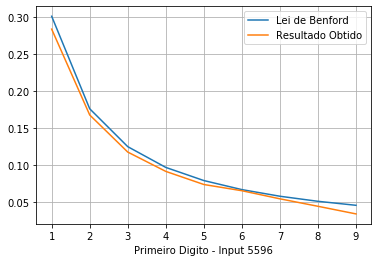

In [17]:
import xlrd

def num_sheet(caminho):
    excel = xlrd.open_workbook(caminho)
    return int(excel.nsheets)


#caminho = input("Digite o caminho: ")
#sheet = int(input("Digite o sheet: "))
caminho = "Arquivos/benford.xls"
sheet = 1

for i in range(0, sheet):

    matrix = excel_input(caminho, i)

    signal = lambda x: abs(x)
    for i in range(0, len(matrix)):
        matrix[i] = list(map(signal, matrix[i]))

    my = replaceMatrixToFirstDigit(matrix)
    my = gen_benford(my)
    my2 = benford()
    plot(my, my2, i+1)

# Questão 6
    IA

# Naive Bayers #

In [22]:
import sys
!{sys.executable} -m pip install python-mnist
!{sys.executable} -m pip install matplotlib

In [1]:
from functools import reduce

def naive_bayers(IDCheck, IDTDisc, isIt):
    # IDCheck = Input Data Checked #
    # IDTDisc = Input Data To Discover #
    # isIt representa o resultado que queremos obter :) 
    
    # Esse if diz se o input de dados verificados tem uma #
    # Coluna a mais que o de dados não checados #
    if len(IDCheck[0]) != len(IDTDisc[0]) + 1:
        print("Input Error: IDCheck and IDTDisc is not compatible!")
        return "Error"
    
    new = []
    
    for i in range(0, len(IDTDisc)):
        temp = nb_probabily_to_specificID(IDCheck, IDTDisc[i], isIt)
        new.append(temp)
    
    #print(new)
    return new
    
def nb_probabily_to_specificID(IDCheck, specificID, isIt):
    data = []
    # Este for irá percorrer todas as colunas procurando dados específicos # 
    for i in range(0, len(IDCheck[0])-1):
        # Criarei um novo dado na minha lista de dados #
        if specificID[i] != 0:
            data.append(0)
            sum = 0
            # Percorrendo as linhas olhando esse dado #
            for j in range(0, len(IDCheck)):
                # Se a resposta bate com a que queremos #
                if IDCheck[j][len(IDCheck[0])-1] == isIt:
                    sum += 1
                    # Se é igual ao fornecido pelo specificID #
                    if IDCheck[j][i] == specificID[i]:
                        data[len(data)-1] += 1

            # Esse ponto do código pega a probabilidade #
            # de se obter a resposta x a partir de um   #
            # Sub-conjunto dos dados que tem a resposta # 
            # compativel com a requerida                #
            # print(f"{data[i]} / {sum}")

            data[len(data)-1] = data[len(data)-1] / sum
    
    # Definindo a probabilidade da resposta #
    
    finalProbability = 0
    
    for i in range(0, len(IDCheck)):
        if IDCheck[i][len(IDCheck[0])-1] == isIt:
            finalProbability += 1
    
    # print(f"{finalProbability} / {len(IDCheck)}")
    finalProbability = finalProbability / len(IDCheck)
    
    # Definindo a probabilidade de cada evento #
    
    probability = []
    
    for i in range(0, len(IDCheck[0])-1):
        
        if specificID[i] != 0:
            probability.append(0)
            for j in range(0, len(IDCheck)):
                if IDCheck[j][i] == specificID[i]:
                    probability[len(probability)-1] += 1
        
            # print(f"{probability[i]} / {len(IDCheck)}")

            probability[len(probability)-1] = probability[len(probability)-1] / len(IDCheck) 
    
    # Após todos esses processos os dados já irão estar prontos para uso #
    # Precisaremos agora multiplicar os dados pela probabilidade de ser  #
    # o valor de resposta entre todos os dados e dividir essa multiplica #
    # pela probabilidade de cada dado                                    #
    
    multi = lambda x, y: x * y
    
    tempData = reduce(multi, data)
    tempProbability = reduce(multi, probability)
    try:
        return (tempData * finalProbability) / tempProbability
    except:
        return 1
    
    

# Input #

In [2]:
import xlrd
import xlwt

def excel_input(caminho, sheet):
    
    # fazendo o xlrd trabalhar #
    excel = xlrd.open_workbook(caminho)
    excel = excel.sheet_by_index(sheet)
    
    # Lista criada #
    arrays = []
    
    for i in range(0, excel.nrows):
        arrays.append([])
        
        for j in range(0, excel.ncols):
            
            arrays[i].append(excel.cell_value(i, j))
        
    return arrays


## Program

In [8]:
from mnist import MNIST
import random

# Adicionando a resposta ao final do dataBank
def append_mnist(dataBank_, labels_):
    for i in range(0, len(dataBank_)):
        dataBank_[i].append(labels_[i])

# Replace em dados diferentes de 0 #
def replace_mnist(dataBank_):
    for i in range(0, len(dataBank_)):
        dataBank_[i] = list(map(lambda x: 240 if x != 0 else 0, dataBank_[i]))
               
# Programa Funcionando #
print("Iniciando testes")
# Importando o mnist #
mnist = MNIST('Arquivos')
# Pegando o mnist de banco de dados #
dataBank, labels = mnist.load_training()
# Está parte está aqui por conta do codificamento da função que #
# Na função proposta o array de resposta contém as informações do #
# Problema e a resposta ao final! e o banco que queremos saber não contem #
dataBank = dataBank[:40000]
labels = labels[:40000]
replace_mnist(dataBank)
append_mnist(dataBank, labels)

# Leitura de um array de testes #
testBank, labelsTest = mnist.load_testing()
replace_mnist(testBank)

hits = 0
for i in range(0, 20):
    # Pegando qualquer elemento da lista #

    index = random.randrange(0, len(labelsTest))

    # Testando todas as possibilidades #
    probability = []
    for isIt in range(0, 10):
        probability.append(nb_probabily_to_specificID(dataBank, testBank[index], isIt))

    print("\n" * 2)
    print(f" Resultado: {probability.index(max(probability))} | Resposta: {labelsTest[index]}")
    print(mnist.display(testBank[index]))
        
    if probability.index(max(probability)) == labelsTest[index]:
        hits += 1
            
print(f"A porcentagem de acertos foi {(hits/20)*100}")


Iniciando testes



 Resultado: 7 | Resposta: 7

............................
............................
............................
............................
............................
............................
............................
..................@@@@@.....
.........@@.....@@@@@@@.....
.........@@@@@@@@@@@@@@.....
........@@@@@@@@@@@@@@......
.......@@@@@@@@@@@@@@.......
.....@@@@@@@@@...@@@@.......
....@@@@@@@.....@@@@@.......
....@@@@@.......@@@@........
.....@@@.......@@@@.........
..............@@@@@.........
..............@@@@..........
.............@@@@@..........
.............@@@@@..........
............@@@@@...........
............@@@@............
...........@@@@.............
..........@@@@@@............
..........@@@@@@............
..........@@@@@.............
..........@@@@..............
............................



 Resultado: 9 | Resposta: 9

............................
............................
............................
....................




 Resultado: 3 | Resposta: 3

............................
............................
............................
............................
............................
.....@@@@@@@@@@@............
.....@@@@@@@@@@@@@..........
....@@@@@@@@@@@@@@..........
....@@@@.@@@@@@@@@@.........
.....@@.......@@@@@.........
.............@@@@@..........
.............@@@@@..........
...........@@@@@@@..........
.........@@@@@@@@...........
........@@@@@@@@@@..........
........@@@@@@@@@@@@........
........@@@@@@@@@@@@@.......
................@@@@@.......
...........@@@@@.@@@@.......
.........@@@@@@@..@@@.......
.........@@@@@..@@@@@.......
.........@@@@..@@@@@@.......
.........@@@@@@@@@@@@.......
.........@@@@@@@@@@.........
..........@@@@@@@@..........
............................
............................
............................



 Resultado: 2 | Resposta: 2

............................
............................
............................
............................
........

# Importando Titanic Dataset #

In [4]:
import pandas as pd
import numpy as np

def male_female(person):

    person = person

    if 'female' in person:
        person.append(0)
        person.append(1)
        person = list(filter(lambda a: a != 'female', person))

    elif 'male' in person:
        person.append(1)
        person.append(0)
        person = list(filter(lambda a: a != 'male', person))

    if 'nan' in person:
        person.replace(np.nan, 0)

    return person


def import_titanic(caminho):

    # Import do dataset #
    titanic = pd.read_csv(caminho)

    # Filtragem de dados #
    titanic.drop(['Ticket', 'Name', 'PassengerId', 'Cabin', 'Embarked'], axis=1, inplace=True)

    # Alocagem de dados em lista #
    titanic = titanic.dropna(axis=1, how='any')
    people = list(titanic.values)
    for i in people:
        i = list(i)

    # Lista de Informações definda #

    for i in range(0, len(people)):
        temp = male_female(list(people[i]))
        people[i] = None
        people[i] = temp

    # Fazer o label #
    label = []

    for i in range(0, len(people)):
        people[i] = list(people[i])
        label.append(people[i][0])

        del(people[i][0])
        #print(person)

    return people, label

# Erito Marques

In [52]:
from math import sin as sen
from math import cos as cos
from math import log
from math import pi
from random import randint
from random import uniform as randfloat
from random import random as randunit
from numpy import exp as e
from functools import reduce as reduce


class Chromosome:
    def __init__(self, function, operation, string):
        self.function = function
        self.operation = operation
        self.string = string


def gen_string_trigonometry_function(is_sen, is_positive, multi_in, probability):
    f = "null"

    if is_positive is True:
        signal = "1"
    else:
        signal = "-1"

    if is_sen is True and probability in range(0, 11):
        f = f"{signal} * sen({multi_in} * x)"
    elif is_sen is False and probability in range(0, 11):
        f = f"{signal} * cos({multi_in} * x)"
    # Euler  #
    elif is_sen is True and probability in range(11, 21):
        f = f"{signal} * sen(e(x))"
    elif is_sen is False and probability in range(11, 21):
        f = f"{signal} * cos(e(x))"
    # PI #
    elif is_sen is True and probability in range(21, 31):
        f = f"{signal} * sen(pi/({multi_in}*x))"
    elif is_sen is False and probability in range(21, 31):
        f = f"{signal} * cos(pi/({multi_in}*x))"
    # LOG #
    elif is_sen is True and probability in range(31, 41):
        f = f"{signal} * sen(log(x**2)) if x != 0 else 1"
    elif is_sen is False and probability in range(31, 41):
        f = f"{signal} * cos(log(x**2)) if x != 0 else 1"
    # EULER DIV #
    elif is_sen is True and probability in range(41, 51):
        f =  f"{signal} * sen(e(1) * x / {multi_in})"
    elif is_sen is False and probability in range(41, 51):
        f = f"{signal} * cos(e(1) * x / {multi_in})"
    # EULER-PI #
    elif is_sen is True and probability in range(51, 61):
        f = f"{signal} * sen(e({multi_in % 10})/x)"
    elif is_sen is False and probability in range(51, 61):
        f = f"{signal} * cos(e({multi_in % 10})/x)"
    # MULTI 10 #
    elif is_sen is True and probability in range(61, 71):
        f = f"{signal} * sen(x * ({multi_in} % 10))"
    elif is_sen is False and probability in range(61, 71):
        f = f"{signal} * cos(x * ({multi_in} % 10))"
    # MULTI -10 #
    elif is_sen is True and probability in range(71, 81):
        f = f"{signal} * sen(x * ({multi_in} % -10))"
    elif is_sen is False and probability in range(71, 81):
        f = f"{signal} * cos(x * ({multi_in} % -10))"
    #  PI #
    elif is_sen is True and probability in range(81, 91):
        f = f"{signal} * sen(pi*x)"
    elif is_sen is False and probability in range(81, 91):
        f =  f"{signal} * cos(pi*x)"
    # PI**2 #
    elif is_sen is True and probability in range(91, 101):
        f = f"{signal} * sen(pi**2 * cos(x))"
    elif is_sen is False and probability in range(91, 101):
        f = f"{signal} * cos(pi**2 * sen(x))"

    return f


def gen_trigonometry_function(is_sen, is_positive, multi_in, probability):
    """
    :param is_sen:  Se refere ao tipo da função (sen ou cos)
    :param is_positive: Se refere a -1 ou 1
    :param multi_in: Se refere a multiplicar internamente a função (sen("3"x))
    :param probability: probabilidade de ser euler ou pi ou normal
    :return: Resultado da função
    """
    f = "null"
    if is_positive is True:
        signal = 1
    else:
        signal = -1

    # Função normal #
    if is_sen is True and probability in range(0, 11):
        f = lambda x: signal * sen(multi_in * x)
    elif is_sen is False and probability in range(0, 11):
        f = lambda x: signal * cos(multi_in * x)
    # Euler  #
    elif is_sen is True and probability in range(11, 21):
        f = lambda x: signal * sen(e(x))
    elif is_sen is False and probability in range(11, 21):
        f = lambda x: signal * cos(e(x))
    # PI #
    elif is_sen is True and probability in range(21, 31):
        f = lambda x: signal * sen(pi/(multi_in*x)) if x != 0 else signal * sen(pi/(multi_in))
    elif is_sen is False and probability in range(21, 31):
        f = lambda x: signal * cos(pi/(multi_in*x)) if x != 0 else signal * sen(pi/(multi_in))
    # LOG #
    elif is_sen is True and probability in range(31, 41):
        f = lambda x: signal * sen(log(x**2)) if x != 0 else 1
    elif is_sen is False and probability in range(31, 41):
        f = lambda x: signal * cos(log(x**2)) if x != 0 else 1
    # EULER DIV #
    elif is_sen is True and probability in range(41, 51):
        f = lambda x: signal * sen(e(1) * x / multi_in)
    elif is_sen is False and probability in range(41, 51):
        f = lambda x: signal * cos(e(1) * x / multi_in)
    # EULER-PI #
    elif is_sen is True and probability in range(51, 61):
        f = lambda x: signal * sen(e(x % 10))
    elif is_sen is False and probability in range(51, 61):
        f = lambda x: signal * cos(e(x % 10))
    # MULTI 10 #
    elif is_sen is True and probability in range(61, 71):
        f = lambda x: signal * sen(x * (multi_in % 10))
    elif is_sen is False and probability in range(61, 71):
        f = lambda x: signal * cos(x * (multi_in % 10)) 
    # MULTI -10 #
    elif is_sen is True and probability in range(71, 81):
        f = lambda x: signal * sen(x * (multi_in % -10))
    elif is_sen is False and probability in range(71, 81):
        f = lambda x: signal * cos(x * (multi_in % -10))
    #  PI #
    elif is_sen is True and probability in range(81, 91):
        f = lambda x: signal * sen(pi*x)
    elif is_sen is False and probability in range(81, 91):
        f = lambda x: signal * cos(pi*x)
    # PI**2 #
    elif is_sen is True and probability in range(91, 101):
        f = lambda x: signal * sen(pi**2 * cos(x))
    elif is_sen is False and probability in range(91, 101):
        f = lambda x: signal * cos(pi**2 * sen(x))
    
    def func(x):
        return f(x)

    return func


def relation_string(catch):
    # Função resposável por fornecer a relação entre as funções #
    # Definindo uma operação relacional #
    if catch == 1:
        f = "/"
    elif catch == 2:
        f = "*"
    elif catch == 3:
        f = "-"
    else:
        f = "+"

    return f


def relation(catch):
    # Função resposável por fornecer a relação entre as funções #
    # Definindo uma operação relacional #
    if catch == 1:
        f = lambda x, y: x / y
    elif catch == 2:
        f = lambda x, y: x * y
    elif catch == 3:
        f = lambda x, y: x - y
    else:
        f = lambda x, y: x + y

    def func(x, y):
        try:
            return f(x, y)
        except ZeroDivisionError:
            return x

    return func


def create_chromosome(size):

    # Var Usadas para Sort #
    boolean = [True, False]

    chromosomes = []

    for i in range(0, size):
        is_sen = boolean[randint(0, 1)]; is_positive = boolean[randint(0, 1)]
        multi_in = round(randfloat(-90000, +90000), 2); probability = randint(0, 100)

        catch = randint(1, 4)

        temp = gen_trigonometry_function(is_sen, is_positive, multi_in, probability)
        temp2 = relation(catch)
        temp3 = gen_string_trigonometry_function(is_sen, is_positive, multi_in, probability)
        temp3 = temp3 + relation_string(catch)
        chromosomes.append(Chromosome(temp, temp2, temp3))

    chromosomes.append(randunit())

    return chromosomes

# Somando cromossomo num array #
def chromosome_sum(chromosome, array):
    check = lambda x: 1 if x >= 0.0 else 0
    if len(chromosome) - 1 != len(array):
        print("Chromosome's length is incompatible with array's length")
        return "Trash"

    sum = 0.0

    for i in range(0, len(array)):
        if i == 0:
            sum = chromosome[i].function(array[i])
        else:
            sum = chromosome[i-1].operation(sum, chromosome[i].function(array[i]))

    sum = chromosome[len(array)-1].operation(sum, chromosome[len(chromosome)-1])

    return check(sum)

# Relacionando dois cromossomos e gerando um filho #
def gen_children_chromosome(chromosome1, chromosome2, cut_point, probability):
    if probability > 80:
        return chromosome1[:], chromosome2[:]

    # Definindo filho 1 #
    tempChild1 = chromosome1[:cut_point]
    for k in range(cut_point, len(chromosome1)):
        tempChild1.append(chromosome2[k])

    # Definindo filho 2 #
    tempChild2 = chromosome2[:cut_point]
    for k in range(cut_point, len(chromosome1)):
        tempChild2.append(chromosome1[k])

    tempChild11 = set_mutation(tempChild1)
    tempChild22 = set_mutation(tempChild2)

    return tempChild11, tempChild22

# Essa função vai definir uma mutação no meu cromossomo #
def set_mutation(chromosome):
    boolean = [True, False]
    make_mutation = randfloat(0, 100)
    # Se for maior que um a gente ignora e segue a life #
    if make_mutation > 1:
        return chromosome
    # Definindo função #
    is_sen = boolean[randint(0, 1)]; is_positive = boolean[randint(0, 1)]
    multi_in = round(randfloat(-90000, +90000), 2); probability = randint(0, 100)

    catch = randint(1, 4)

    cell = randint(0, len(chromosome)-2)
    
    chromosome = chromosome[:]
    chromosome[cell] = None
    temp2 = relation(catch)
    temp = gen_trigonometry_function(is_sen, is_positive, multi_in, probability)
    temp3 = gen_string_trigonometry_function(is_sen, is_positive, multi_in, probability)
    temp3 += relation_string(catch)
    
    chromosome[cell] = Chromosome(temp, temp2, temp3)
    
    return chromosome[:]

# Copiar #
def copy(chromo):
    new = []
    for i in chromo:
        new.append(i[:])
        
    return new

# Essa função é feita pra receber um cromossomo e converte-lo em string #
def gen_string(strr):
    string = ""
    for k in range(0, len(strr) - 1):
        string += strr[k].string.replace("x", f"x[{k}]")
    string += str(strr[len(strr) - 1])

    return string

'''
Usual Functions:
>> gen_children_chromosome(chromosome1, chromosome2, cut_point, probability)
>> create_chromosome(size)
>> chromosome_sum(chromosome, array)
>> gen_string(chromosome)
'''
# Achar a var #
def element(valor, vetor):
    soma = 0
    for i in range(0, len(vetor)):
        soma += vetor[i]
        if valor <= soma:
            return i

# Funções de controle geral #

def genetics(numChromosome, dataBank, labels, tol):
    # Filters #
    is1 = lambda x: 1 if x == 1 else 0
    is0 = lambda x: 1 if x == 0 else 0
    soma = lambda x, y: x + y
    size = len(dataBank[0])
    
    print(f"Dados: {len(labels)}")
    print(f"1: {reduce(soma, list(map(is1, labels)))} | 0: {reduce(soma, list(map(is0, labels)))}")
    
    # Definindo geração inicial #
    
    generation = []
    
    for i in range(0, numChromosome):
        generation.append(create_chromosome(size))
    # Testando #
    correct = []
    for chromosome in generation:
        sum = 0
        
        for i in range(0, len(labels)):
            resposta = chromosome_sum(chromosome, dataBank[i])
            if resposta == labels[i]:
                sum += 1
        correct.append(sum)
    print(correct)
        
    while max(correct) / len(labels) < tol:
        f = lambda x, y: x + y
        maximum = reduce(f, correct)
        index = correct.index(max(correct))
        
        old_gen = copy(generation)
        generation = []
        generation.append(old_gen[index][:])
        for i in range(0, int(numChromosome/2)):
            r1 = randint(0, maximum)
            r2 = randint(0, maximum)
            cut = randint(0, len(dataBank[0]))
            prob = randint(0, 100)
            
            temp1, temp2 = gen_children_chromosome(old_gen[element(r1, correct)], old_gen[element(r2, correct)], cut, prob)
            
            generation.append(temp1)
            generation.append(temp2)
               
        correct = []
        for chromosome in generation:
            sum = 0
            for i in range(0, len(labels)):
                resposta = chromosome_sum(chromosome, dataBank[i])
                if resposta == labels[i]:
                    sum += 1
            correct.append(sum)
        print(correct)
    
    print("\n\n\n")
    
    index = correct.index(max(correct))
    print(f"Com {max(correct)} acertos a função é: ")
    print(gen_string(generation[index]))
            

## Input

In [56]:
# Pegando o titanic de banco de dados #
dataBank, labels = import_titanic('Arquivos/titanic_data.csv')
genetics(150, dataBank, labels, 0.80)

Dados: 891
1: 342 | 0: 549
[239, 530, 198, 233, 431, 384, 336, 270, 283, 316, 528, 537, 413, 337, 188, 498, 353, 505, 549, 549, 339, 432, 460, 551, 283, 553, 447, 342, 341, 320, 478, 539, 368, 464, 463, 489, 376, 607, 582, 550, 701, 527, 464, 558, 560, 350, 310, 539, 701, 517, 411, 343, 307, 463, 336, 549, 212, 460, 527, 498, 506, 375, 348, 342, 504, 668, 591, 701, 342, 335, 190, 366, 289, 434, 338, 299, 287, 190, 282, 435, 413, 693, 285, 432, 287, 701, 536, 323, 561, 334, 411, 277, 376, 431, 441, 342, 342, 597, 321, 190, 527, 495, 432, 301, 453, 363, 500, 413, 701, 476, 620, 542, 696, 244, 407, 353, 408, 234, 610, 549, 380, 190, 387, 339, 523, 312, 549, 342, 275, 362, 549, 373, 549, 592, 337, 696, 258, 355, 470, 545, 599, 214, 329, 243, 356, 431, 461, 312, 549, 385]
[701, 342, 314, 593, 486, 549, 549, 498, 484, 188, 525, 696, 275, 549, 369, 350, 549, 289, 607, 470, 693, 342, 549, 397, 429, 350, 467, 549, 463, 549, 498, 342, 478, 366, 433, 545, 491, 549, 595, 549, 561, 453, 343, 504, 5

[704, 616, 340, 701, 549, 549, 701, 579, 659, 600, 549, 520, 440, 701, 546, 549, 294, 549, 409, 515, 326, 342, 687, 449, 476, 342, 268, 692, 602, 383, 549, 394, 438, 524, 549, 549, 337, 551, 549, 549, 549, 544, 549, 549, 573, 549, 561, 517, 549, 704, 701, 552, 504, 432, 621, 549, 701, 613, 486, 519, 344, 667, 563, 530, 608, 549, 447, 323, 549, 504, 549, 560, 261, 549, 549, 330, 676, 515, 701, 323, 549, 613, 678, 549, 549, 570, 549, 444, 549, 591, 617, 701, 230, 643, 605, 581, 699, 490, 701, 414, 259, 486, 549, 672, 703, 701, 286, 701, 549, 701, 476, 564, 640, 667, 652, 575, 549, 549, 549, 674, 702, 549, 701, 543, 700, 549, 690, 588, 581, 342, 623, 549, 549, 549, 593, 549, 701, 440, 672, 394, 549, 387, 186, 602, 701, 601, 701, 639, 374, 701, 656]
[704, 261, 622, 342, 555, 701, 669, 374, 549, 667, 667, 701, 613, 702, 623, 452, 549, 677, 546, 649, 531, 549, 549, 564, 551, 578, 549, 559, 623, 697, 555, 612, 549, 644, 701, 613, 639, 693, 580, 685, 549, 549, 323, 546, 701, 549, 394, 701, 549

[704, 701, 531, 701, 701, 642, 329, 631, 631, 429, 699, 701, 542, 663, 701, 704, 701, 701, 400, 701, 549, 701, 536, 342, 701, 591, 500, 701, 400, 701, 679, 549, 701, 701, 701, 363, 582, 233, 637, 348, 610, 701, 701, 701, 549, 701, 566, 696, 429, 500, 701, 671, 671, 629, 701, 438, 701, 402, 628, 704, 541, 676, 701, 701, 549, 343, 549, 701, 701, 549, 659, 686, 276, 324, 445, 541, 490, 653, 701, 701, 701, 701, 549, 701, 701, 498, 678, 701, 675, 532, 618, 701, 618, 504, 696, 610, 317, 347, 496, 594, 701, 581, 680, 549, 701, 701, 678, 701, 701, 701, 565, 504, 695, 347, 685, 701, 278, 681, 677, 701, 656, 238, 493, 530, 418, 701, 429, 701, 343, 549, 701, 701, 539, 612, 624, 591, 549, 549, 576, 549, 701, 678, 342, 586, 576, 563, 652, 549, 342, 549, 443]
[704, 701, 238, 701, 701, 549, 631, 701, 668, 342, 689, 701, 629, 709, 580, 696, 701, 695, 572, 384, 497, 653, 695, 549, 698, 701, 591, 483, 594, 346, 701, 701, 624, 549, 652, 659, 696, 701, 704, 230, 611, 701, 701, 689, 655, 624, 541, 618, 701

[709, 701, 706, 701, 701, 701, 701, 701, 701, 701, 701, 701, 701, 701, 701, 701, 686, 701, 701, 701, 426, 706, 706, 701, 680, 701, 701, 701, 701, 701, 701, 701, 701, 701, 701, 701, 701, 662, 454, 701, 695, 701, 701, 701, 701, 612, 701, 701, 701, 701, 701, 701, 701, 701, 701, 701, 701, 701, 701, 686, 701, 701, 701, 701, 701, 701, 548, 695, 549, 701, 701, 701, 701, 701, 701, 709, 669, 701, 694, 648, 701, 701, 701, 691, 657, 701, 701, 701, 701, 701, 701, 701, 660, 701, 686, 684, 534, 701, 701, 623, 701, 701, 663, 686, 701, 701, 695, 701, 701, 701, 701, 701, 342, 701, 701, 701, 695, 701, 701, 701, 701, 701, 701, 701, 342, 701, 701, 701, 693, 701, 701, 701, 684, 701, 701, 701, 701, 701, 695, 691, 701, 686, 684, 494, 530, 701, 701, 701, 701, 701, 701]
[709, 701, 701, 701, 701, 701, 701, 695, 701, 654, 560, 706, 701, 701, 701, 686, 612, 701, 701, 701, 701, 701, 426, 701, 677, 696, 701, 701, 701, 701, 701, 701, 701, 701, 701, 701, 660, 701, 701, 701, 701, 611, 709, 695, 701, 701, 701, 701, 680

[711, 701, 701, 701, 701, 701, 701, 701, 701, 701, 701, 701, 701, 701, 701, 701, 701, 583, 701, 700, 701, 701, 701, 701, 701, 701, 701, 701, 701, 701, 701, 692, 701, 701, 701, 701, 701, 701, 701, 651, 701, 645, 701, 700, 701, 700, 701, 701, 696, 640, 657, 701, 687, 641, 657, 701, 701, 657, 695, 701, 701, 687, 701, 701, 701, 701, 701, 701, 625, 701, 701, 701, 701, 701, 701, 701, 687, 701, 701, 701, 701, 701, 701, 701, 701, 701, 701, 700, 700, 697, 644, 701, 701, 701, 657, 709, 643, 701, 608, 701, 701, 701, 701, 701, 711, 701, 701, 693, 701, 700, 688, 701, 701, 701, 701, 701, 701, 701, 701, 701, 701, 701, 701, 701, 701, 701, 701, 701, 701, 701, 701, 701, 700, 701, 701, 701, 688, 477, 697, 701, 701, 528, 701, 701, 701, 700, 701, 711, 700, 701, 701]
[711, 701, 701, 703, 701, 652, 701, 701, 701, 701, 699, 701, 700, 701, 700, 701, 701, 701, 701, 701, 701, 701, 696, 700, 696, 701, 701, 701, 701, 657, 701, 701, 701, 701, 657, 701, 701, 693, 696, 701, 690, 701, 701, 653, 701, 703, 701, 701, 687

# Dendogramação #

In [14]:
import statistics
from numpy import array
from numpy import transpose
import random as rd


# Padronização de uma linha de dados #
def data_standardization(row_bank):
    # Aplicação da formula #
    row_bank = row_bank[:]

    mean = statistics.mean(row_bank)
    deviation = statistics.pstdev(row_bank, mu=None)
    if mean == 0:
        deviation = 1
    data_standardized = lambda x: (x - mean) / deviation

    return list(map(data_standardized, row_bank))


# Padronização da matriz da matriz de dados #
def data_bank_standardization(matrix_bank):
    matrix_bank = transpose(matrix_bank).tolist()
    for i in range(0, len(matrix_bank)):
        matrix_bank[i] = data_standardization(matrix_bank[i])

    return transpose(matrix_bank).tolist()


def remove_columns(matrix_bank):
    remove = []
    # Verificando se existe uma linha com todos os elementos iguais #
    for cols in range(0, len(matrix_bank[0])):
        # Vendo se todos são iguais #
        new = []
        for rows in range(0, len(matrix_bank)):
            new.append(matrix_bank[rows][cols])

        if all(element == new[0] for element in new):
            remove.append(cols)

    for i in remove:
        for row in matrix_bank:
            del(row[i])

    return matrix_bank


def vector_distance(vec1, vec2):

    __dif = lambda x, y: x - y
    __square = lambda x: x * x
    __square_root = lambda x: x ** (1/2)

    vec3 = list(map(__dif, vec1, vec2))
    vec3 = list(map(__square, vec3))

    return __square_root(sum(vec3))

# Classe pra facilitar o manuseio das distancias #
class DataGroups:
    def __init__(self, id_list):
        self.id_list = []
        self.id_list.append(id_list)
        self.distance = []


def union(vec1, vec2):
    new = vec1[:]
    for i in vec2:
        if i not in vec1:
            new.append(i)
    new.sort()
    return new


def min_distance(distance_data):
    distance = []
    for i in distance_data:
        distance.append(i.distance)

    item_a = 0
    item_b = 1
    minimum = distance[0][1]
    for i in range(0, len(distance)):
        for j in range(i+1, len(distance[0])):
            if i != j and distance[i][j] < minimum:
                item_a = i
                item_b = j
                minimum = distance[i][j]

    return item_a, item_b


# Gerando a primeira distancia entre os vetores #
def first_data_distance(matrix_data):
    phainein = []

    # Calcular a distancia #
    for i, vec1 in enumerate(matrix_data):
        phainein.append(DataGroups(i))
        for j, vec2 in enumerate(matrix_data):
            phainein[i].distance.append(vector_distance(vec1, vec2))

    return phainein


def data_distance(distance_data, data_base):

    # Juntando as linhas com menor distância #
    min_x, min_y = min_distance(distance_data)

    distance_data[min_x].id_list = union(distance_data[min_x].id_list, distance_data[min_y].id_list)
    del(distance_data[min_y])

    # Zerando as distâncias #
    for i in distance_data:
        i.distance = []

    for current_element in distance_data:
        # Calculo da distancia entre dois vetores #
        multi_x = len(current_element.id_list)
        # Definindo segundo elemento #
        for second_element in distance_data:
            sum = 0
            multi_y = len(second_element.id_list)
            for i in current_element.id_list:
                for j in second_element.id_list:
                    sum += vector_distance(data_base[i], data_base[j])
            current_element.distance.append((1 / (multi_x * multi_y)) * sum)
    for num in range(0, len(distance_data)):
        distance_data[num].distance[num] = 0
    return distance_data


def gen(size):
    new = []

    for i in range(size):
        new.append([])
        for j in range(size):
            new[i].append(rd.randint(0, 10))

    return new


def dendogramming(matrix):

    matrix = remove_columns(matrix)
    matrix = data_bank_standardization(matrix)

    distance = first_data_distance(matrix)

    iteration = []
    while len(distance) > 1:

        #print(min_distance(distance))

        distance = data_distance(distance, matrix)

        new = []
        for i in distance:
            new.append(i.id_list)

        iteration.append(new)

    for i in iteration:
        print(i)

    from matplotlib import pyplot as plt
    from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
    from scipy.spatial.distance import pdist
    import numpy as np

    np.set_printoptions(precision=5, suppress=True)

    Z = linkage(matrix, 'ward')
    plt.title('Dendograma')
    plt.xlabel('Index')
    plt.ylabel('Distancia')
    dendrogram(
        Z,
        truncate_mode='lastp',  # show only the last p merged clusters
        p=50,  # show only the last p merged clusters
        show_leaf_counts=False,  # otherwise numbers in brackets are counts
        leaf_rotation=90.,
        show_contracted=False,  # to get a distribution impression in truncated branches
    )
    plt.show()

    return

### Input ###

[[0], [1], [2], [3], [4, 12], [5], [6], [7], [8], [9], [10], [11], [13], [14], [15], [16], [17], [18], [19], [20], [21], [22], [23], [24]]
[[0], [1], [2], [3], [4, 12], [5], [6], [7], [8], [9], [10], [11], [13], [14], [15], [16], [17, 21], [18], [19], [20], [22], [23], [24]]
[[0], [1], [2, 14], [3], [4, 12], [5], [6], [7], [8], [9], [10], [11], [13], [15], [16], [17, 21], [18], [19], [20], [22], [23], [24]]
[[0], [1], [2, 14, 22], [3], [4, 12], [5], [6], [7], [8], [9], [10], [11], [13], [15], [16], [17, 21], [18], [19], [20], [23], [24]]
[[0], [1], [2, 14, 22], [3], [4, 5, 12], [6], [7], [8], [9], [10], [11], [13], [15], [16], [17, 21], [18], [19], [20], [23], [24]]
[[0], [1], [2, 14, 19, 22], [3], [4, 5, 12], [6], [7], [8], [9], [10], [11], [13], [15], [16], [17, 21], [18], [20], [23], [24]]
[[0], [1], [2, 14, 19, 22], [3], [4, 5, 12], [6], [7], [8], [9], [10], [11], [13], [15], [16], [17, 20, 21], [18], [23], [24]]
[[0, 4, 5, 12], [1], [2, 14, 19, 22], [3], [6], [7], [8], [9], [10], 

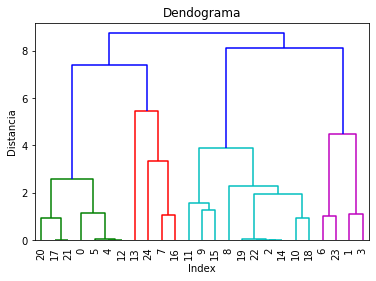

In [16]:
dataBank, labels = import_titanic('Arquivos/titanic_data.csv')
dataBank = dataBank[:25]
dendogramming(dataBank)